In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import chi2_contingency
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('archive/train_transaction.csv')

In [3]:
print(df.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [5]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [ ]:
// drop TransactionID D1-D15 M1 
// yet to explore TransactionDT TransactionAmt card1 card2 card3 card5 addr1 addr2 dist1 dist2 
// categorical variables ProductCD, card4, card6 P_emaildomain R_emaildomain M2-M9
// pca C1-C9 V1-V339

In [4]:
df.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [16]:
df.isnull().sum() / len(df) * 100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.512683
card3              0.265012
card4              0.267044
card5              0.721204
card6              0.266028
addr1             11.126427
addr2             11.126427
dist1             59.652352
dist2             93.628374
P_emaildomain     15.994852
R_emaildomain     76.751617
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.214888
D2                47.549192
D3                44.514851
D4                28.604667
D5                52

In [9]:
df_c = df.filter(list(f'card{i}' for i in [1, 2, 3, 5]) + ['isFraud'])

In [10]:
corr_matrix = df_c.corr()

In [21]:
with open("value_counts.txt", "w") as f:
    for col in df.columns:
        f.write(f"Value counts for {col}:\n{df[col].value_counts()}\n\n")
print("Value counts saved to value_counts.txt")


Value counts saved to value_counts.txt


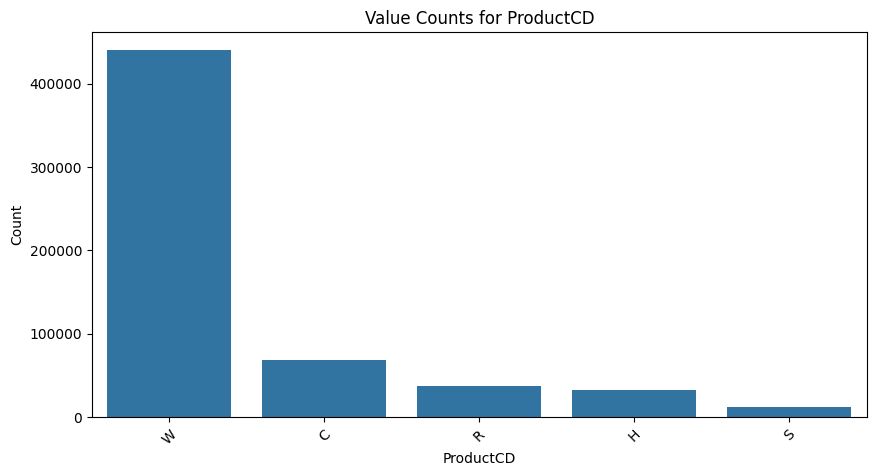

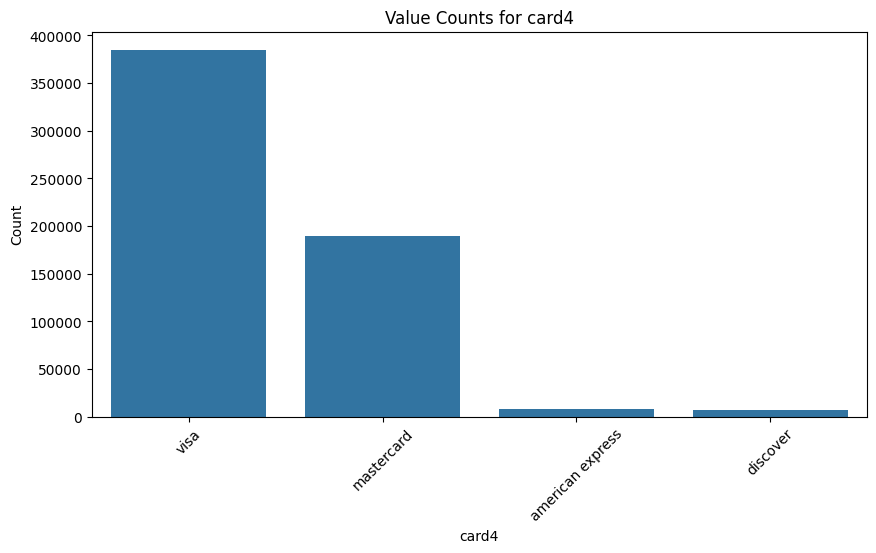

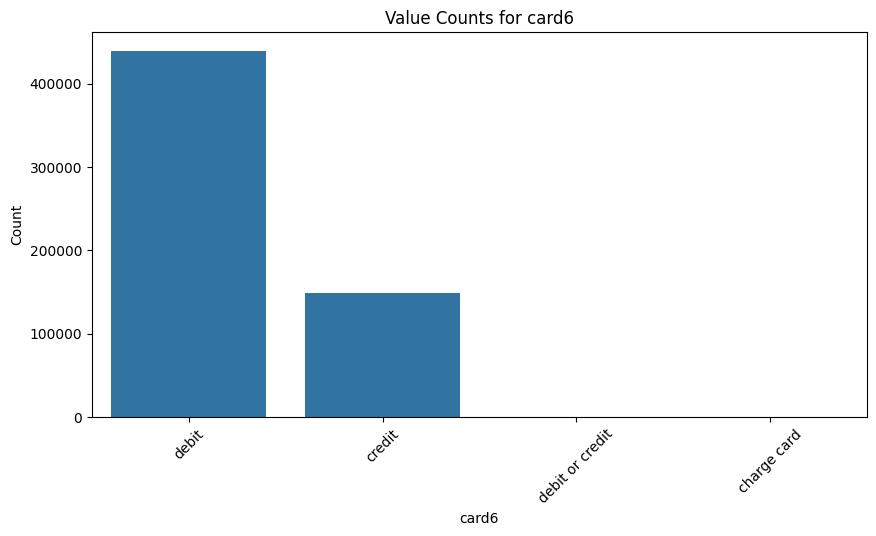

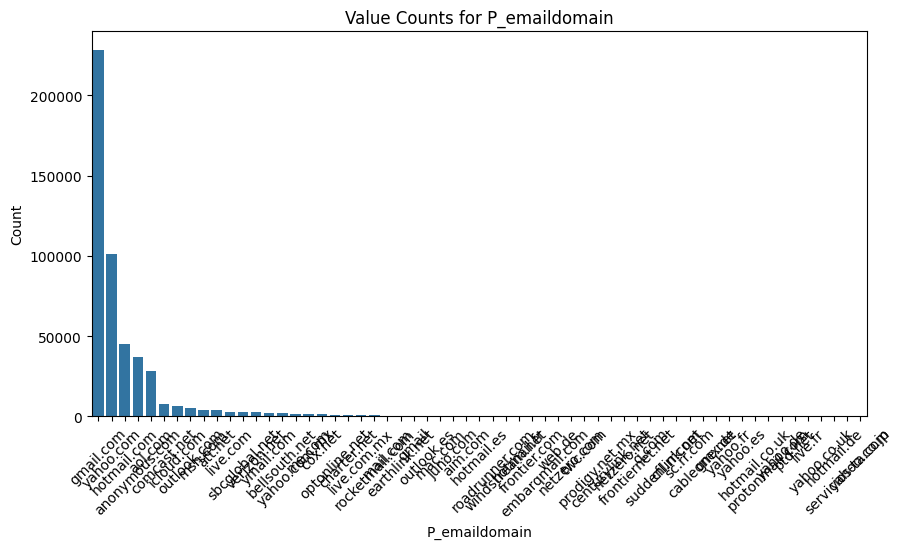

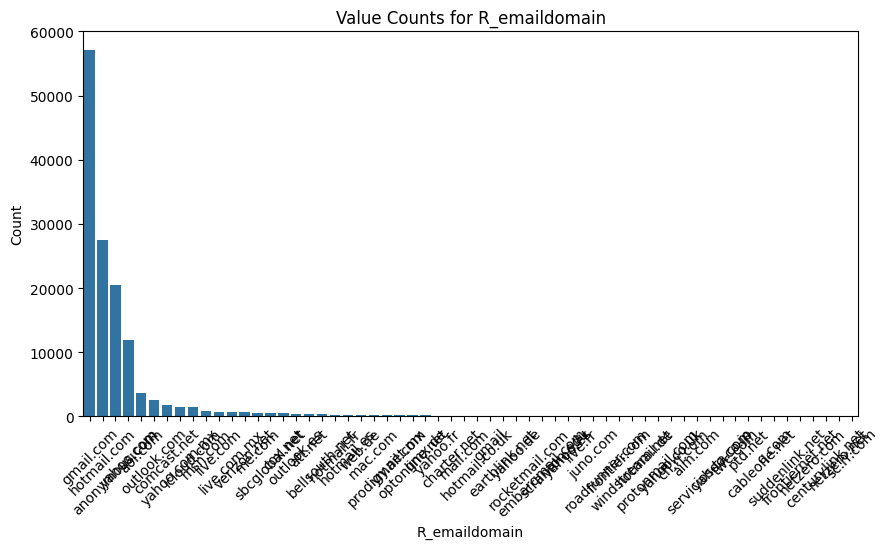

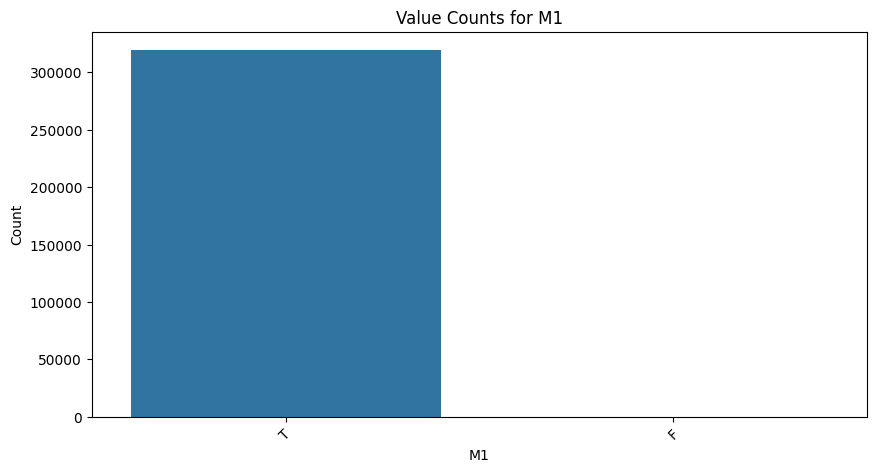

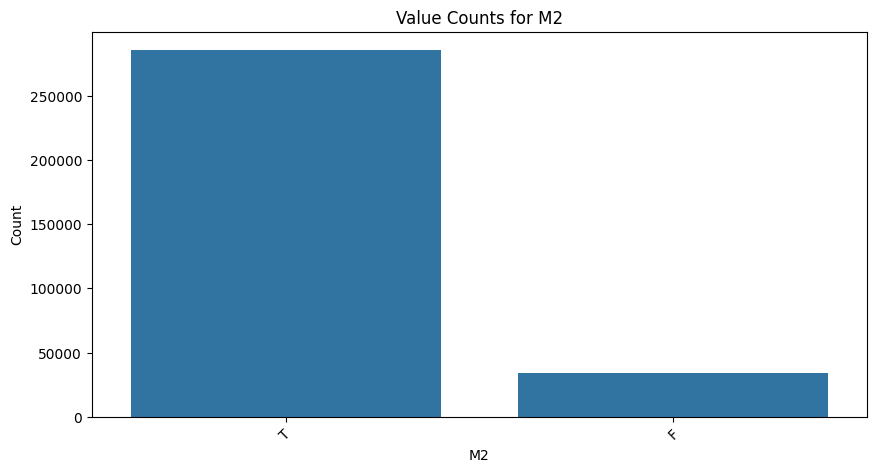

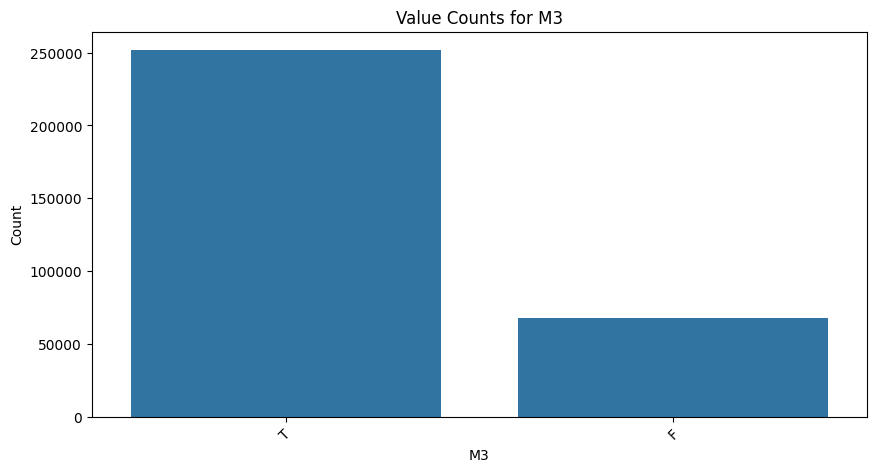

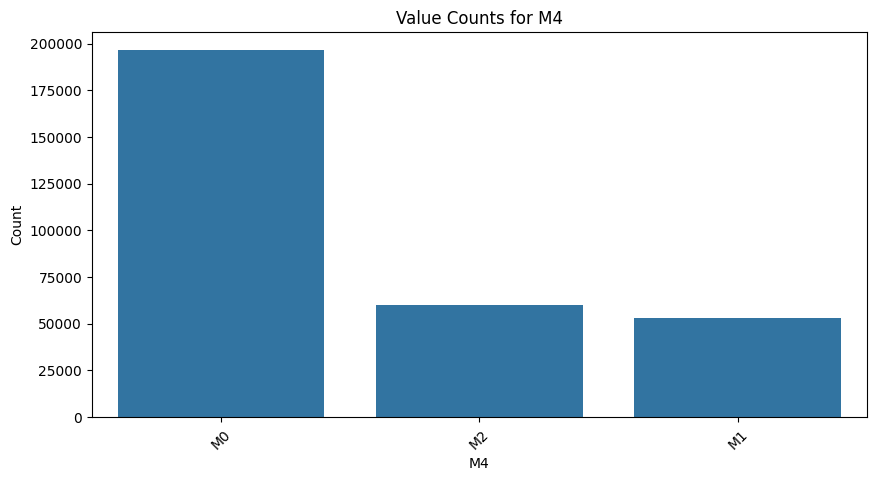

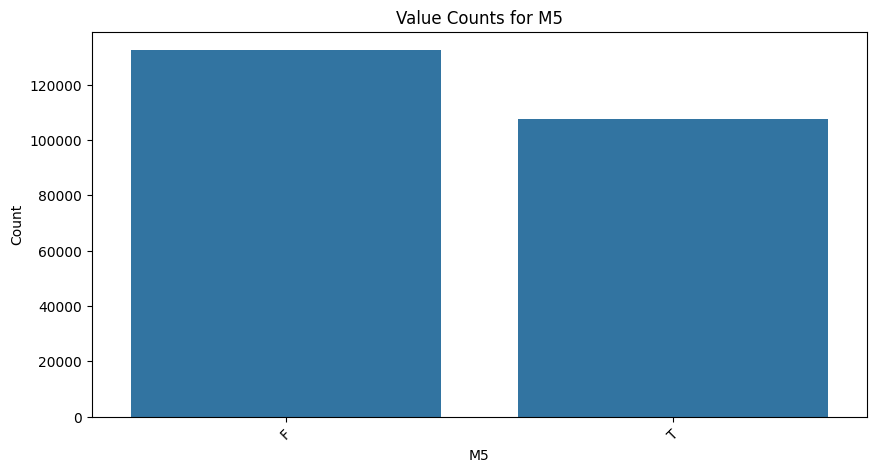

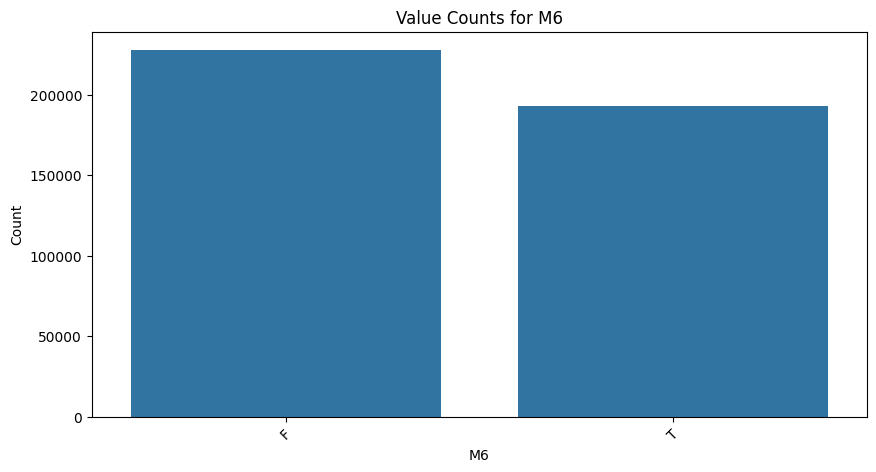

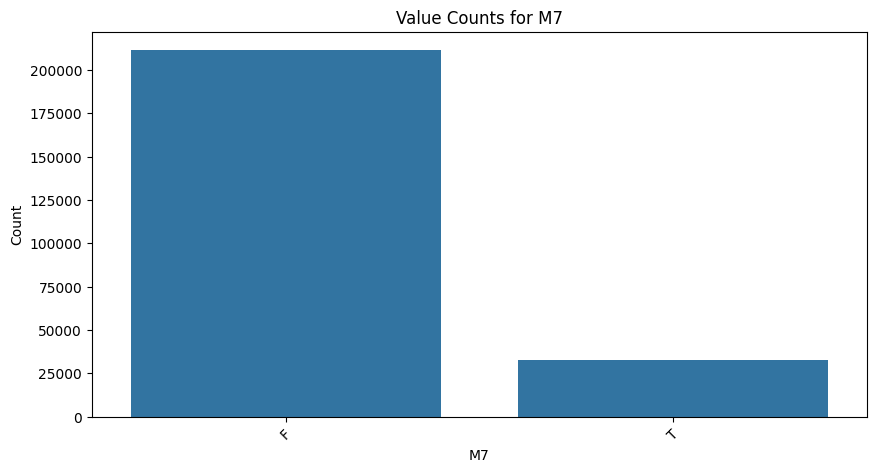

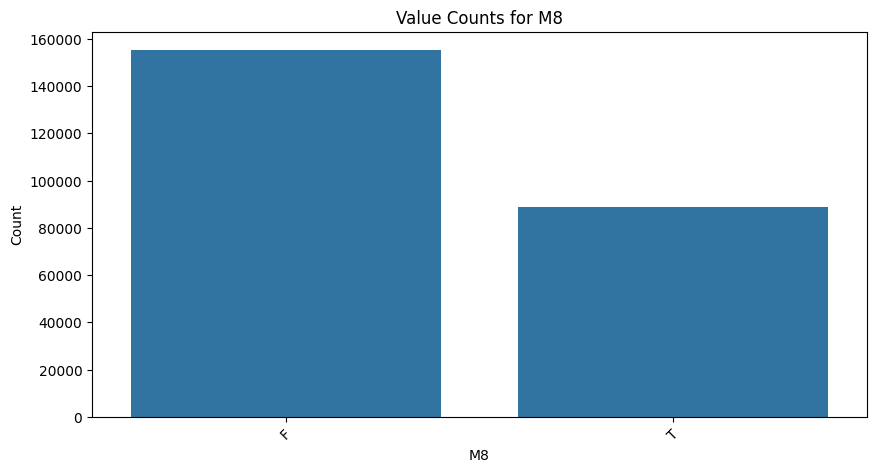

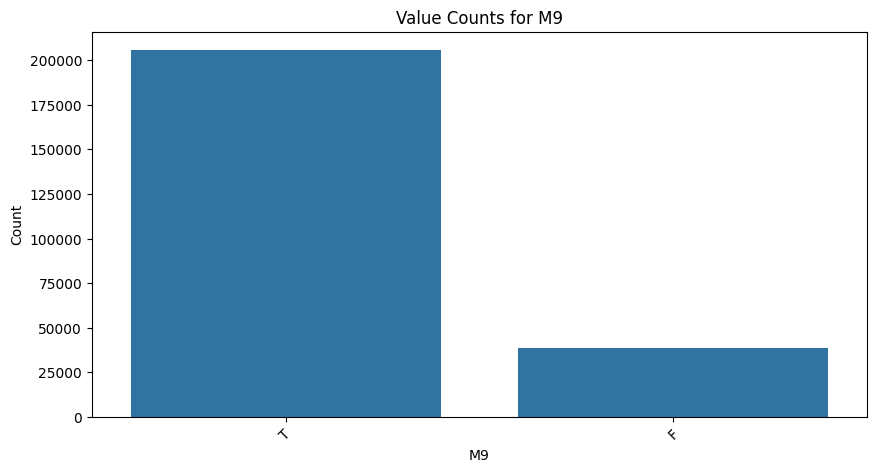

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=["object", "category"]).columns:  # Only categorical columns
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.xticks(rotation=45)
    plt.title(f"Value Counts for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [4]:
df_c = df[list(filter(lambda col: col in [f'C{i}' for i in range(1,15)], df.columns))]

In [5]:
corr_matrix = df_c.corr()

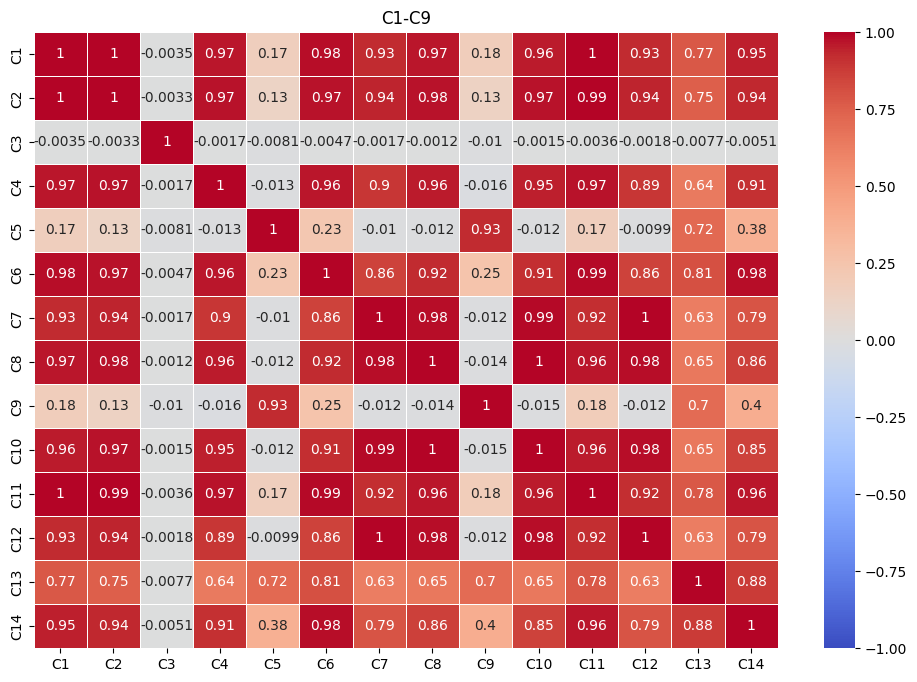

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,cmap="coolwarm", vmax=1, vmin=-1, center=0, linewidths=0.5, annot=True)
plt.title("C1-C9")
plt.show()

In [ ]:
C1, C2, C4, C6, C7, C8, C10, C11, C12, C13, C14
C5, C9
C3

In [11]:
df_c.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000


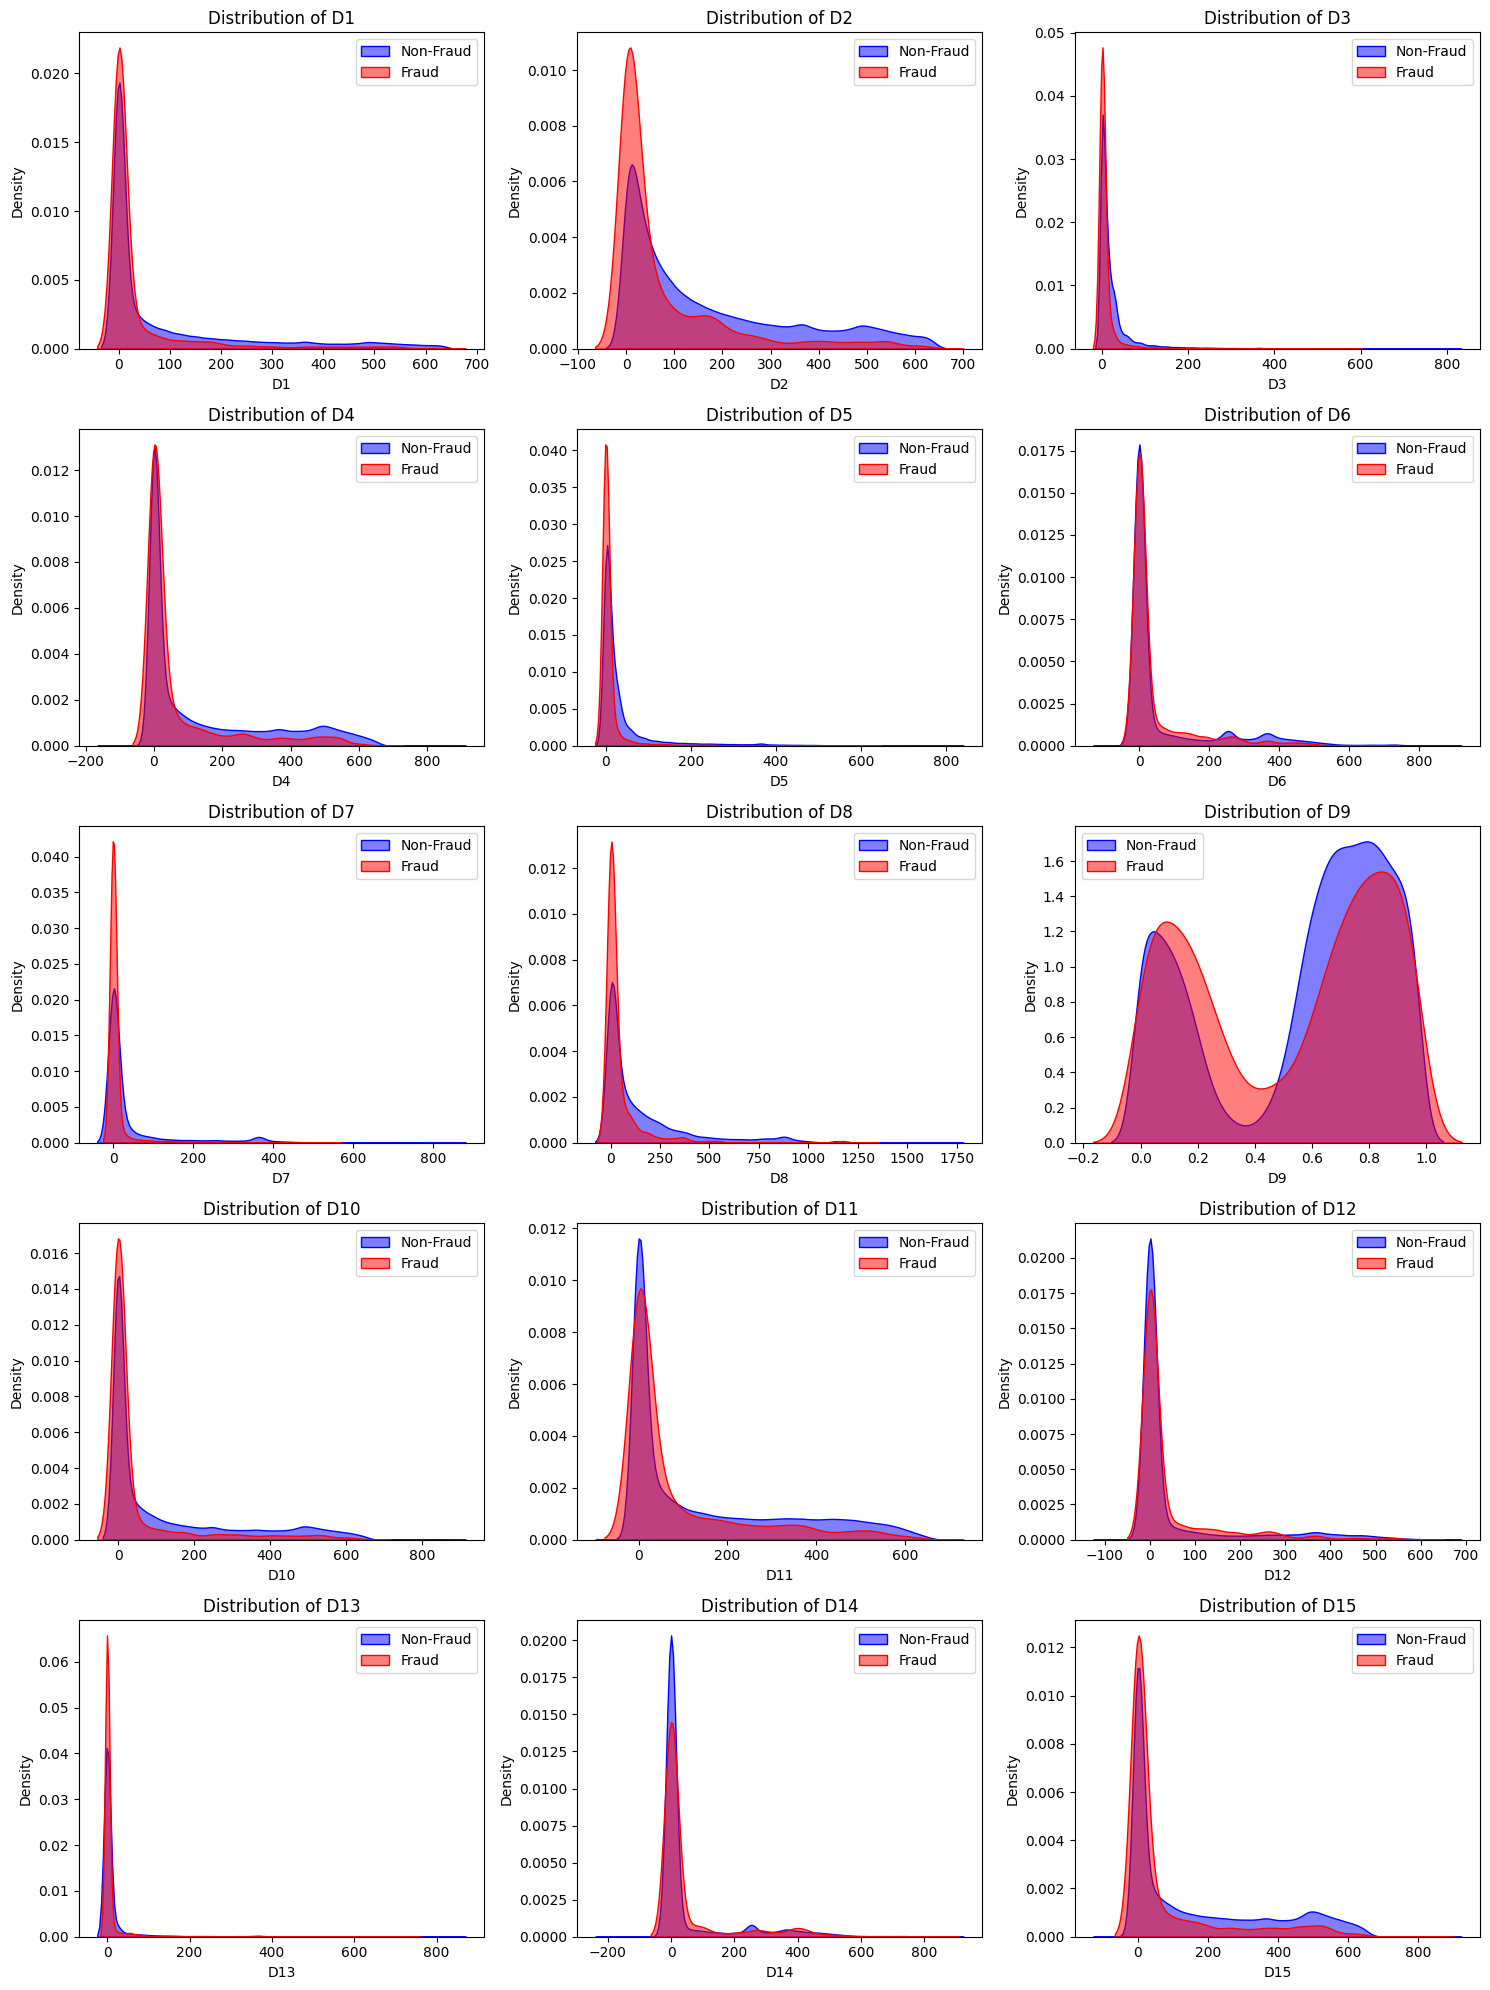

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df_d = df[[col for col in df.columns if col in [f'D{i}' for i in range(1, 16)]] + ['isFraud']]
# Assuming 'is_fraud' is the column indicating fraud (1) and non-fraud (0)
fraud_df = df_d[df_d["isFraud"] == 1]
non_fraud_df = df_d[df_d["isFraud"] == 0]

# Select D1-D15 features
D_features = ["D" + str(i) for i in range(1, 16)]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))  # 5 rows, 3 columns
axes = axes.flatten()  # Flatten for easier iteration

# Plot KDE for each feature
for i, col in enumerate(D_features):
    sns.kdeplot(non_fraud_df[col], label="Non-Fraud", ax=axes[i], fill=True, color="blue", alpha=0.5)
    sns.kdeplot(fraud_df[col], label="Fraud", ax=axes[i], fill=True, color="red", alpha=0.5)
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [5]:
correlation = df[D_features+ ['isFraud']].corr()['isFraud'].sort_values(ascending=False)

In [6]:
print(correlation)

isFraud    1.000000
D14       -0.008663
D12       -0.028864
D9        -0.044253
D11       -0.045094
D3        -0.046271
D6        -0.057236
D13       -0.059430
D5        -0.064638
D1        -0.067193
D4        -0.067216
D10       -0.072002
D15       -0.077519
D2        -0.083583
D7        -0.127199
D8        -0.142636
Name: isFraud, dtype: float64


In [4]:
for col in df.select_dtypes(include=["object", "category"]).columns:
    contingency_table = pd.crosstab(df[col], df['isFraud'])  # Create table
    chi2, p, _, _ = chi2_contingency(contingency_table)  
    print(f"Feature: {col}, Chi2: {chi2}, p-value: {p}")

Feature: ProductCD, Chi2: 16742.17152945829, p-value: 0.0
Feature: card4, Chi2: 364.87413919008776, p-value: 8.969833608323728e-79
Feature: card6, Chi2: 5957.032292414726, p-value: 0.0
Feature: P_emaildomain, Chi2: 3497.8128348386354, p-value: 0.0
Feature: R_emaildomain, Chi2: 3670.552068593734, p-value: 0.0
Feature: M1, Chi2: 0.0, p-value: 1.0
Feature: M2, Chi2: 438.6132128049395, p-value: 2.1690303473971761e-97
Feature: M3, Chi2: 477.6605691634796, p-value: 6.899238511984924e-106
Feature: M4, Chi2: 6450.447979771846, p-value: 0.0
Feature: M5, Chi2: 242.421692035599, p-value: 1.1659485215324222e-54
Feature: M6, Chi2: 227.9641367650961, p-value: 1.6570622223416984e-51
Feature: M7, Chi2: 11.256095635570386, p-value: 0.0007936196443860474
Feature: M8, Chi2: 88.53021549854338, p-value: 5.00642866779864e-21
Feature: M9, Chi2: 250.37250366123354, p-value: 2.1539259079966977e-56


In [6]:
df_v = df[list(filter(lambda col: col in [f'V{i}' for i in range(1,340)], df.columns))]

In [7]:
null_percent = (df_v.isnull().mean() * 100).round(2)  # Convert to percentage & round
null_groups = null_percent.groupby(null_percent).apply(lambda x: list(x.index))  # Group features

# Count features in each group
for percent, features in null_groups.items():
    print(f"Missing Percentage: {percent:.2f}%, Feature Count: {len(features)}")


Missing Percentage: 0.00%, Feature Count: 32
Missing Percentage: 0.05%, Feature Count: 43
Missing Percentage: 0.21%, Feature Count: 11
Missing Percentage: 12.88%, Feature Count: 23
Missing Percentage: 13.06%, Feature Count: 22
Missing Percentage: 15.10%, Feature Count: 20
Missing Percentage: 28.61%, Feature Count: 18
Missing Percentage: 47.29%, Feature Count: 11
Missing Percentage: 76.05%, Feature Count: 16
Missing Percentage: 76.32%, Feature Count: 19
Missing Percentage: 76.36%, Feature Count: 31
Missing Percentage: 77.91%, Feature Count: 46
Missing Percentage: 86.05%, Feature Count: 18
Missing Percentage: 86.12%, Feature Count: 29


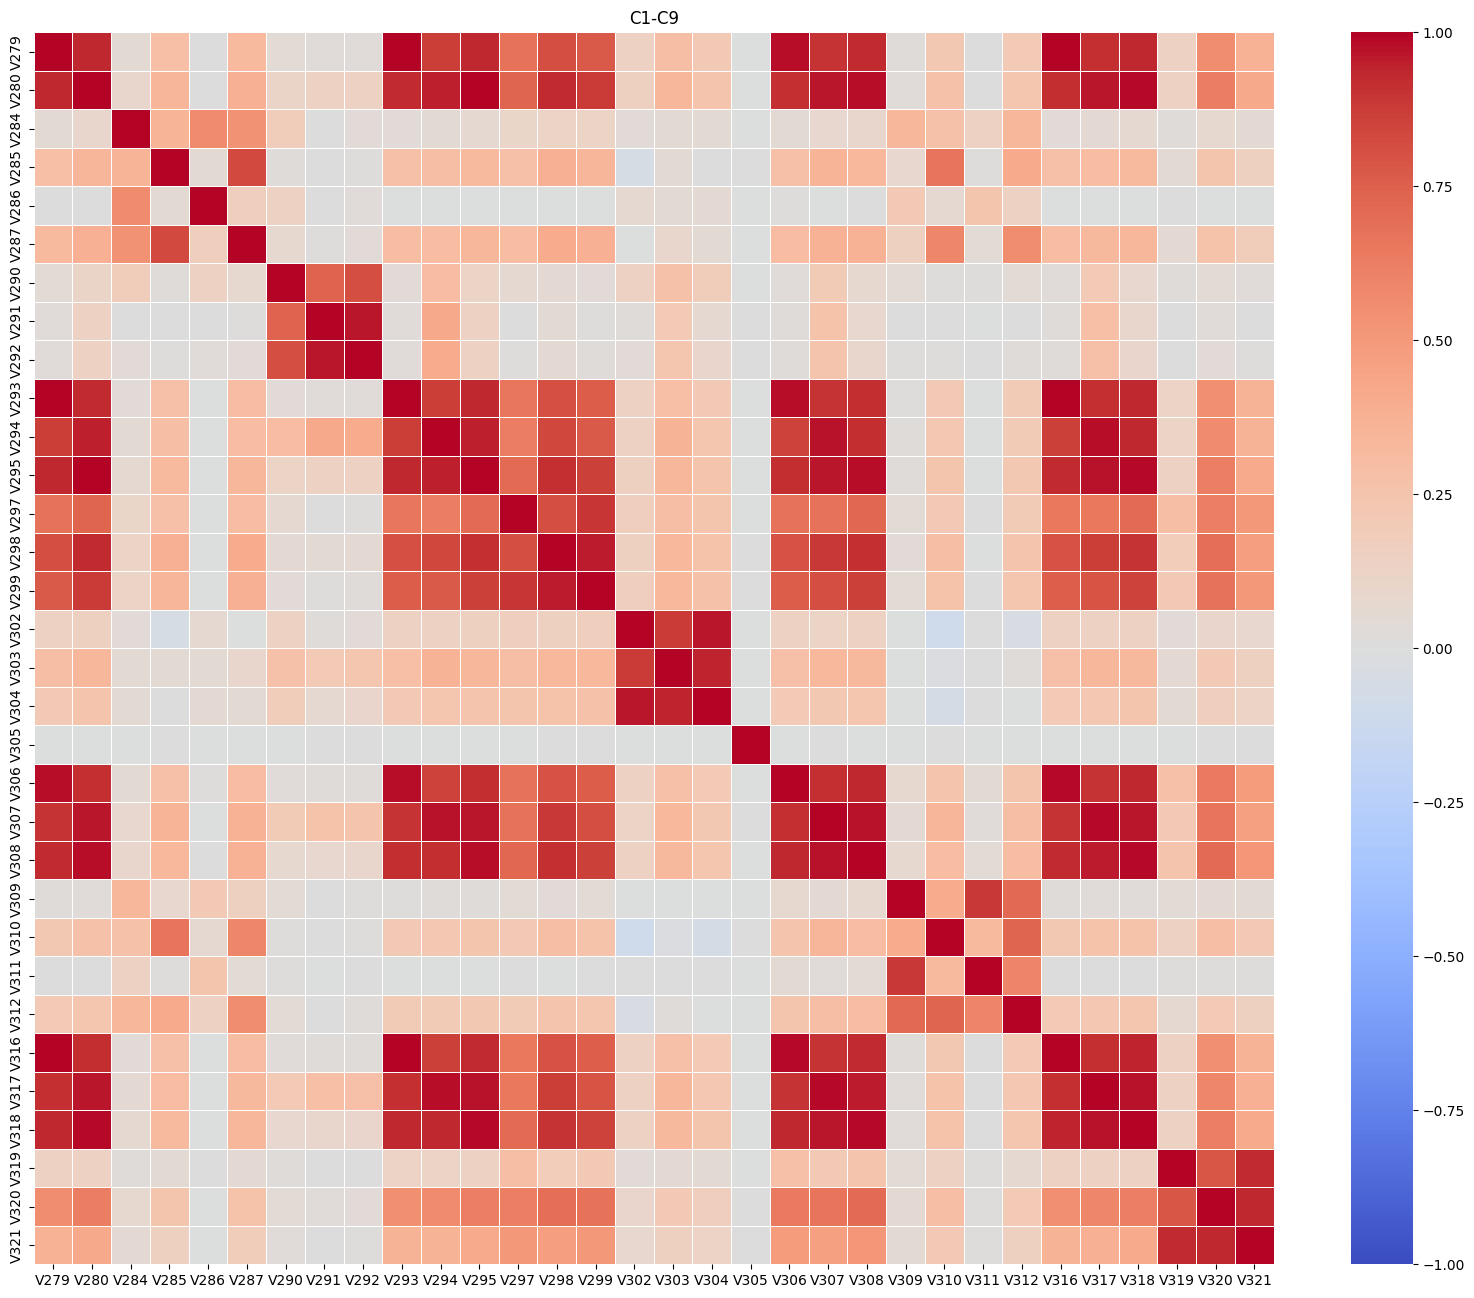

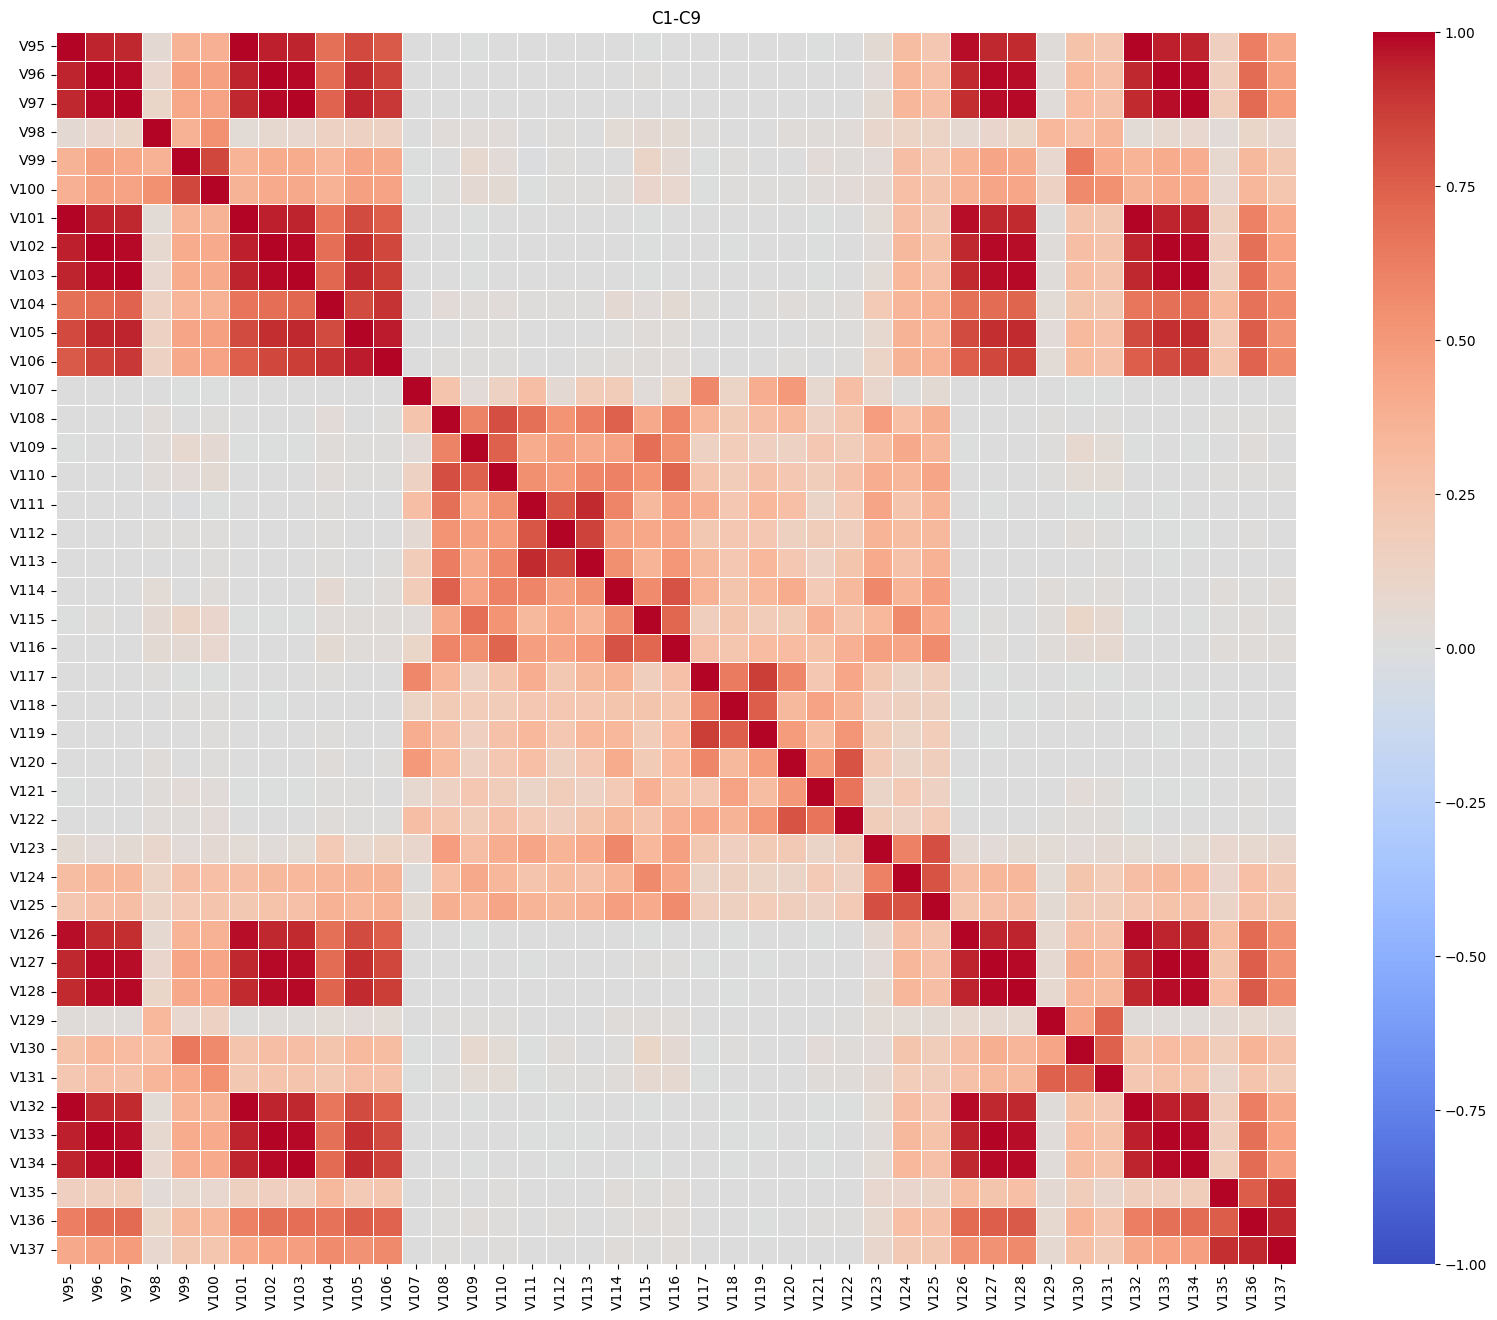

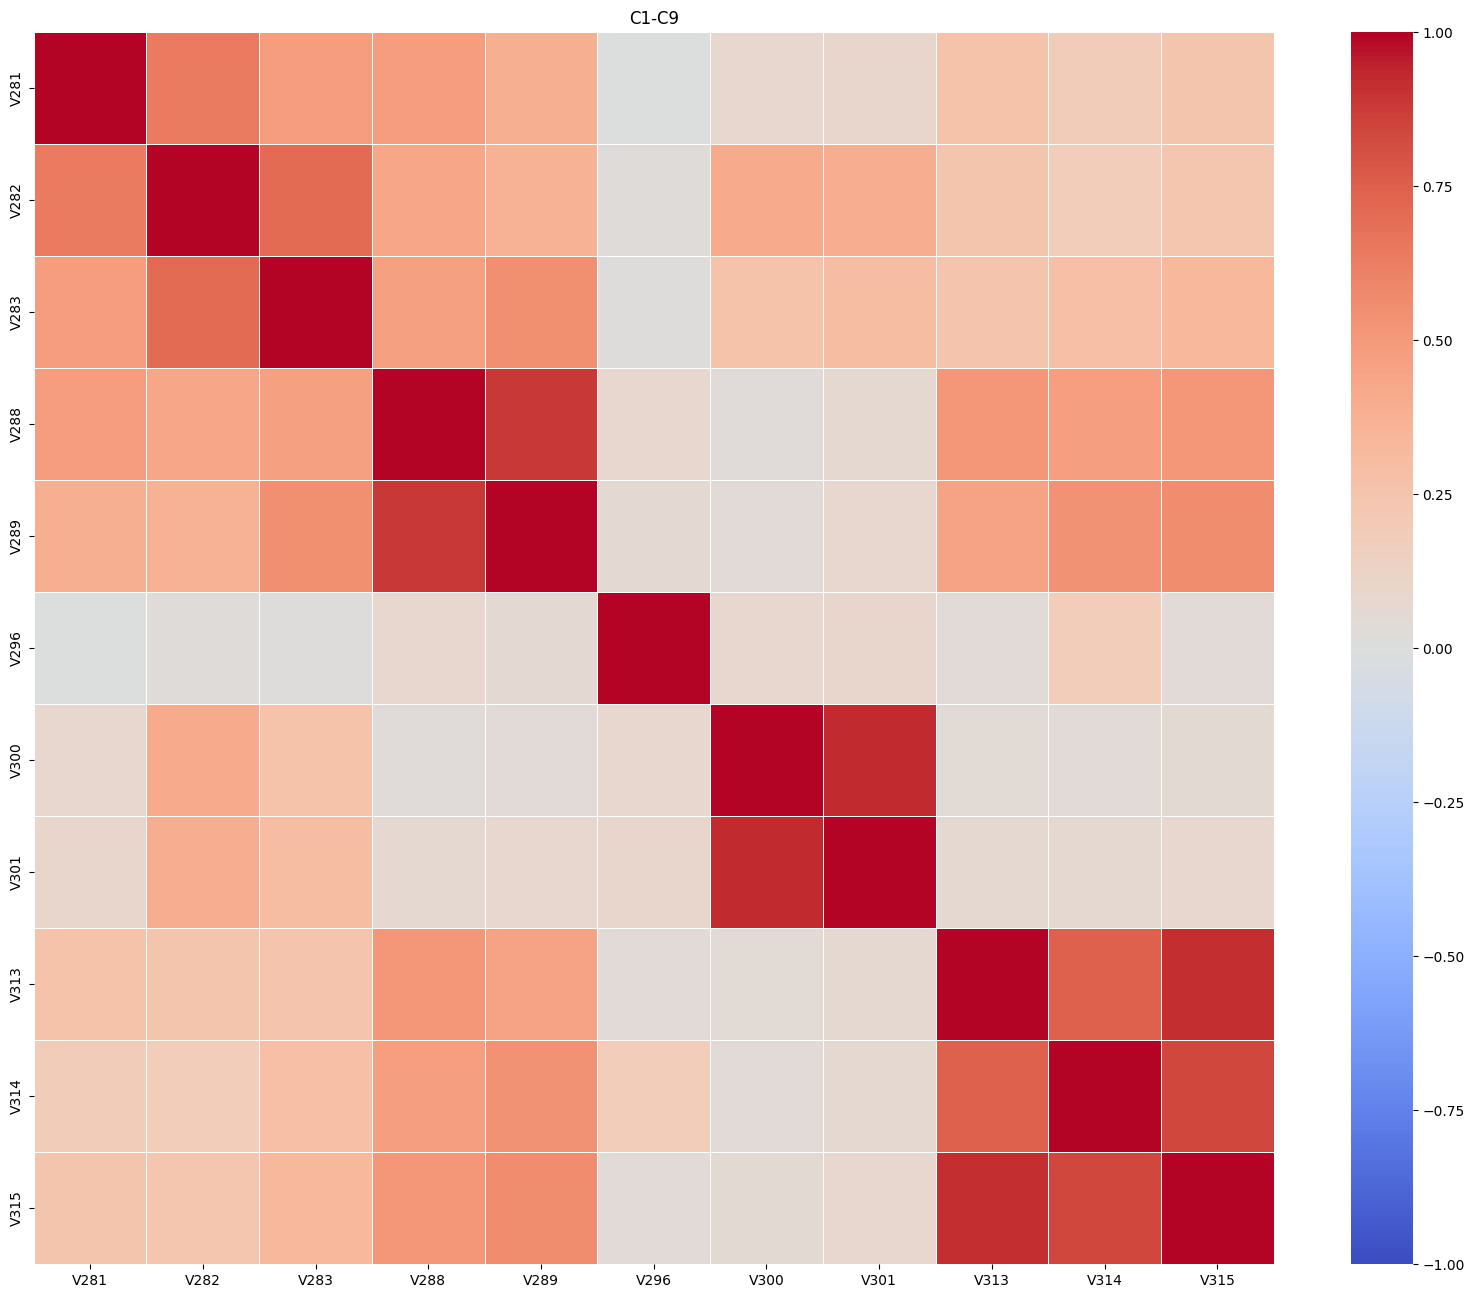

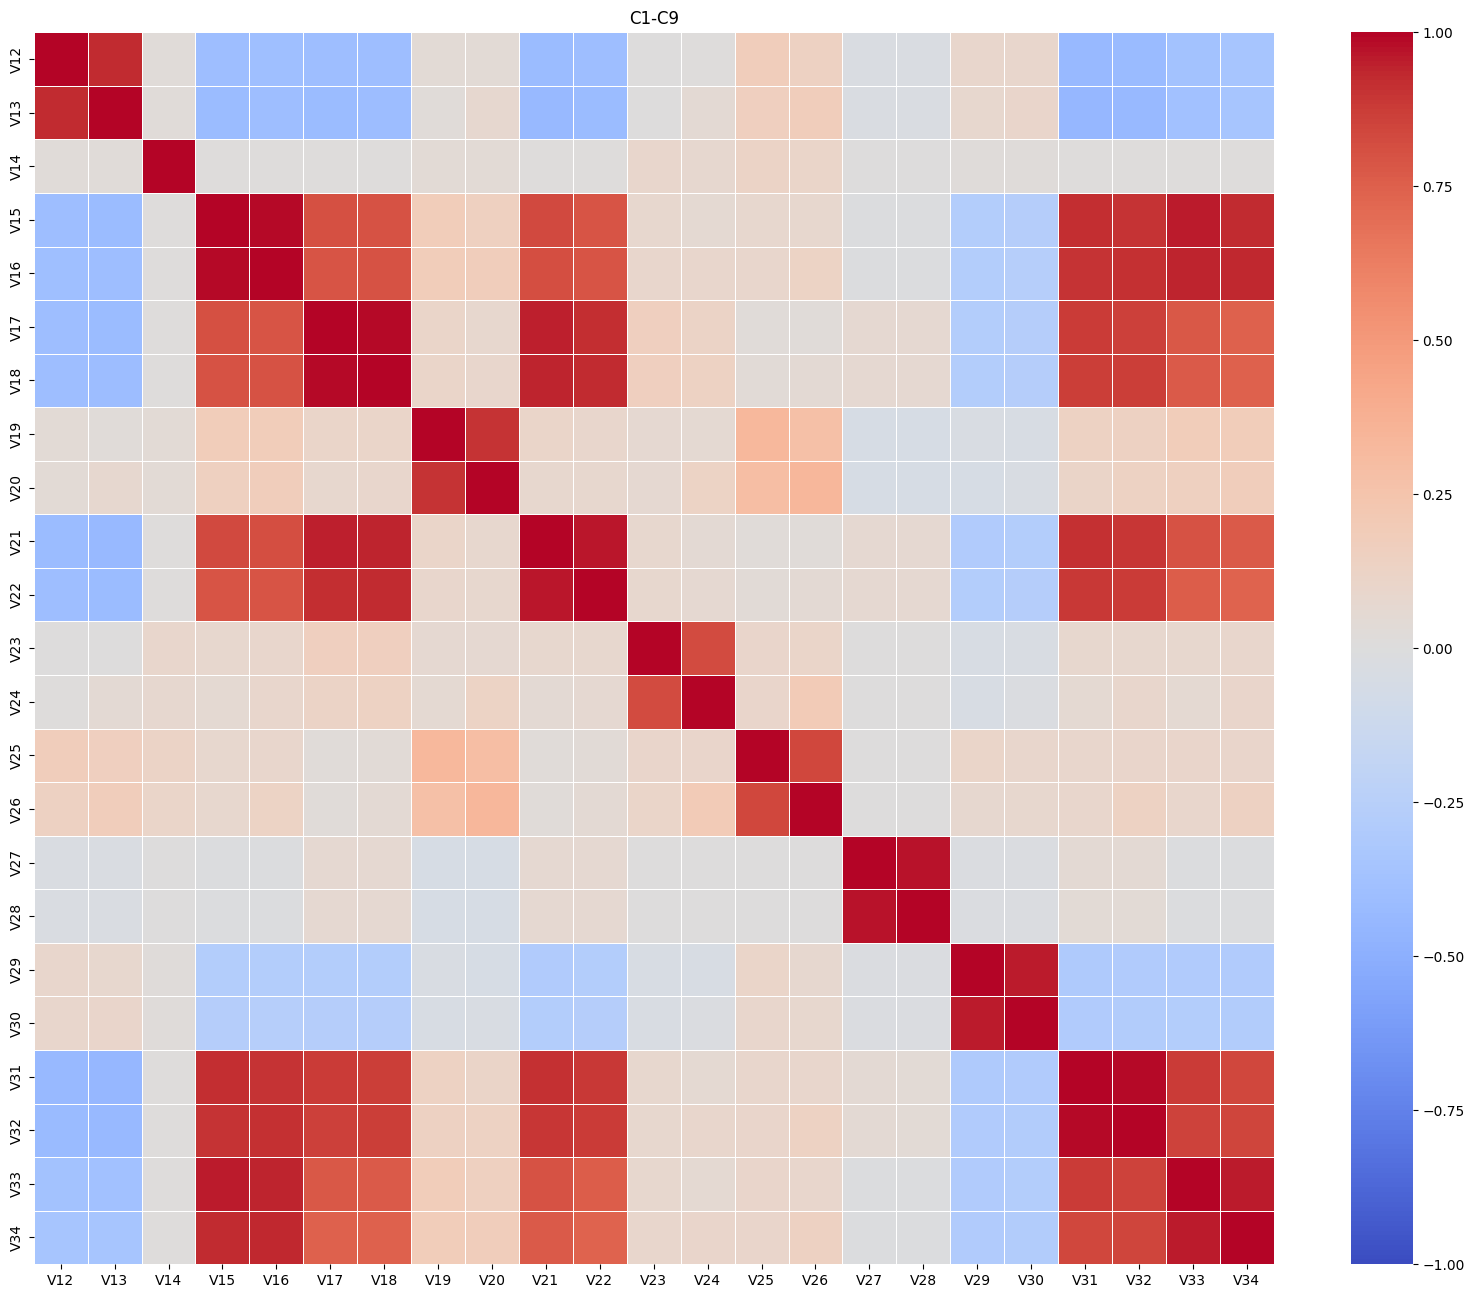

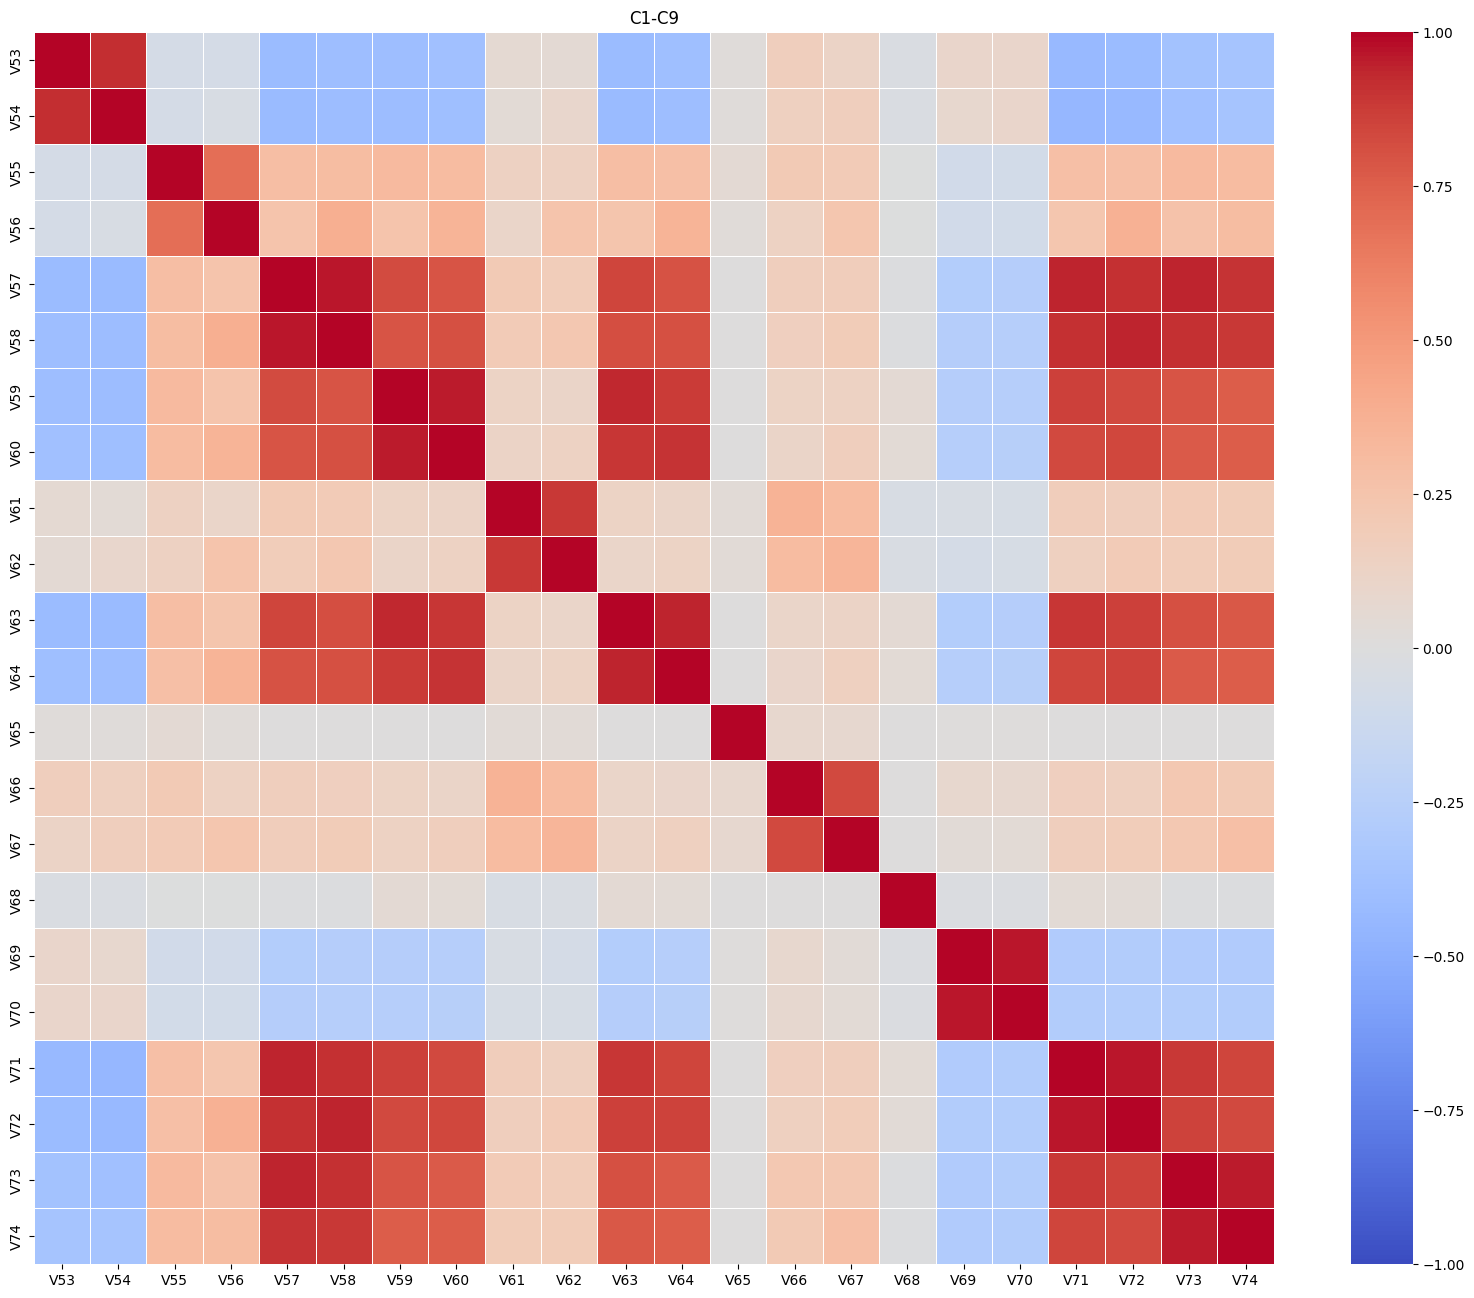

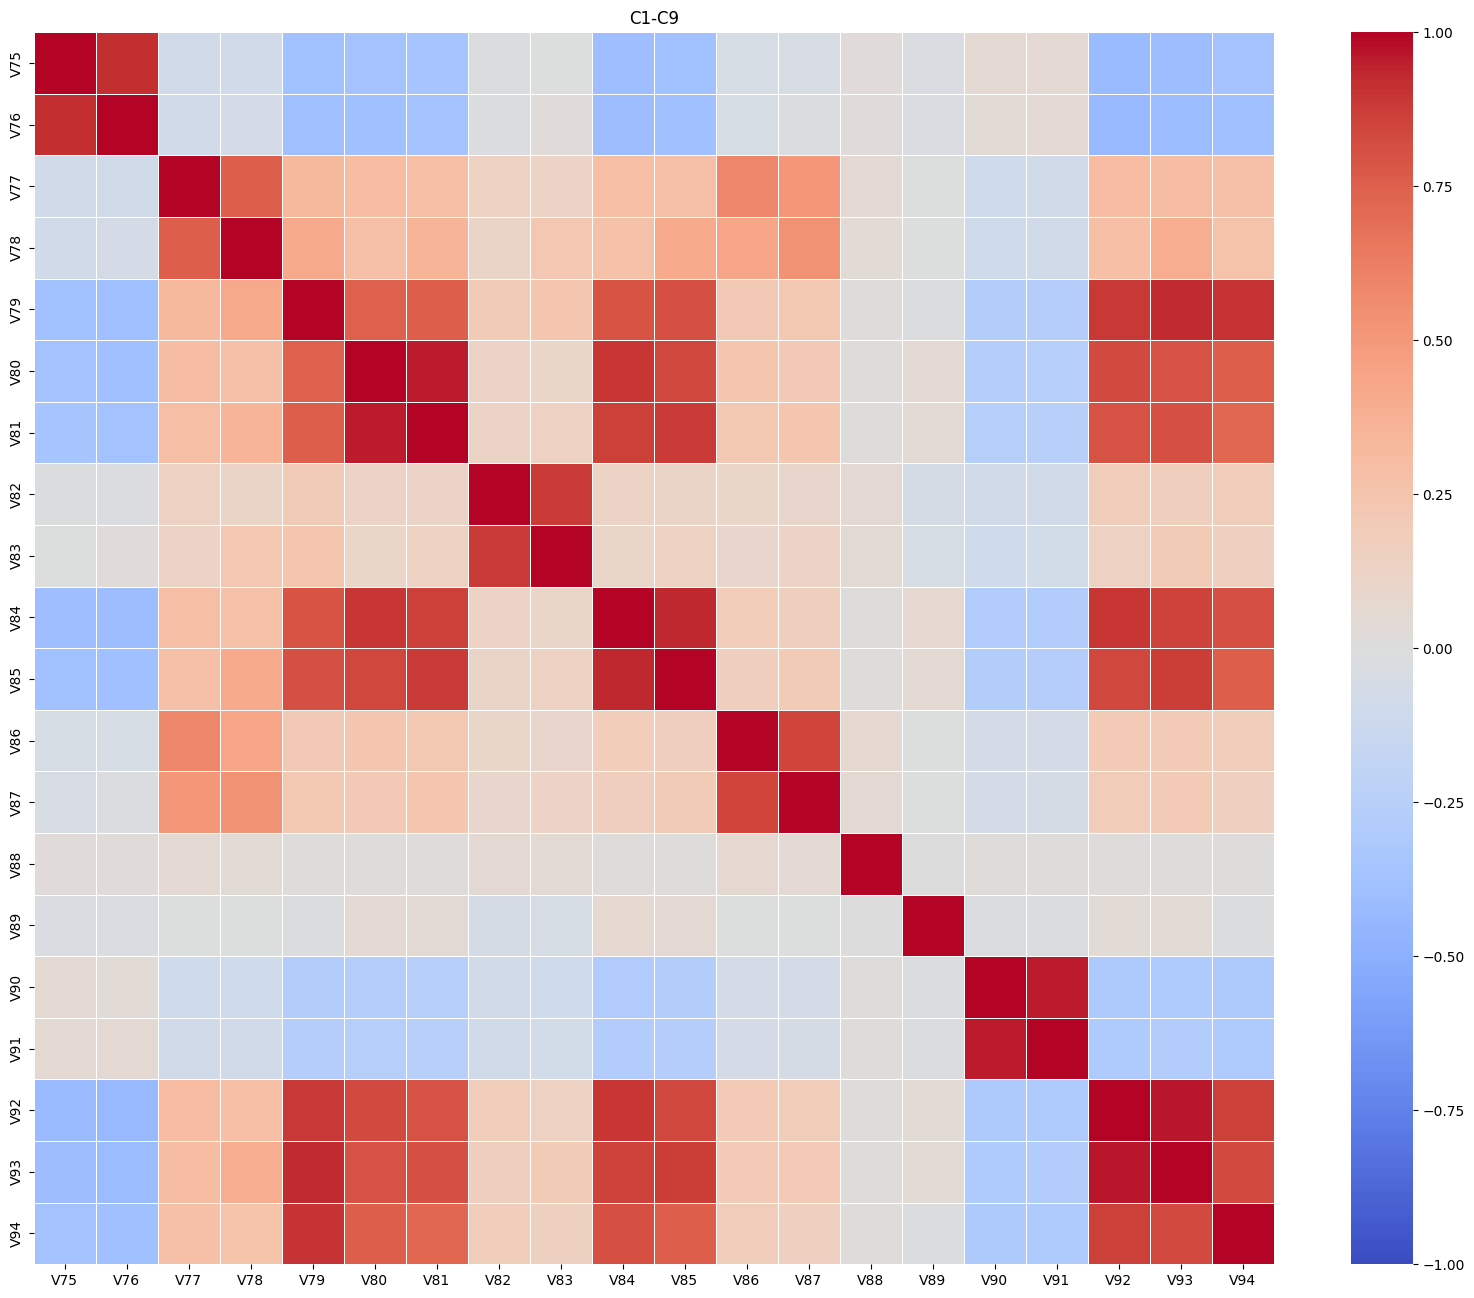

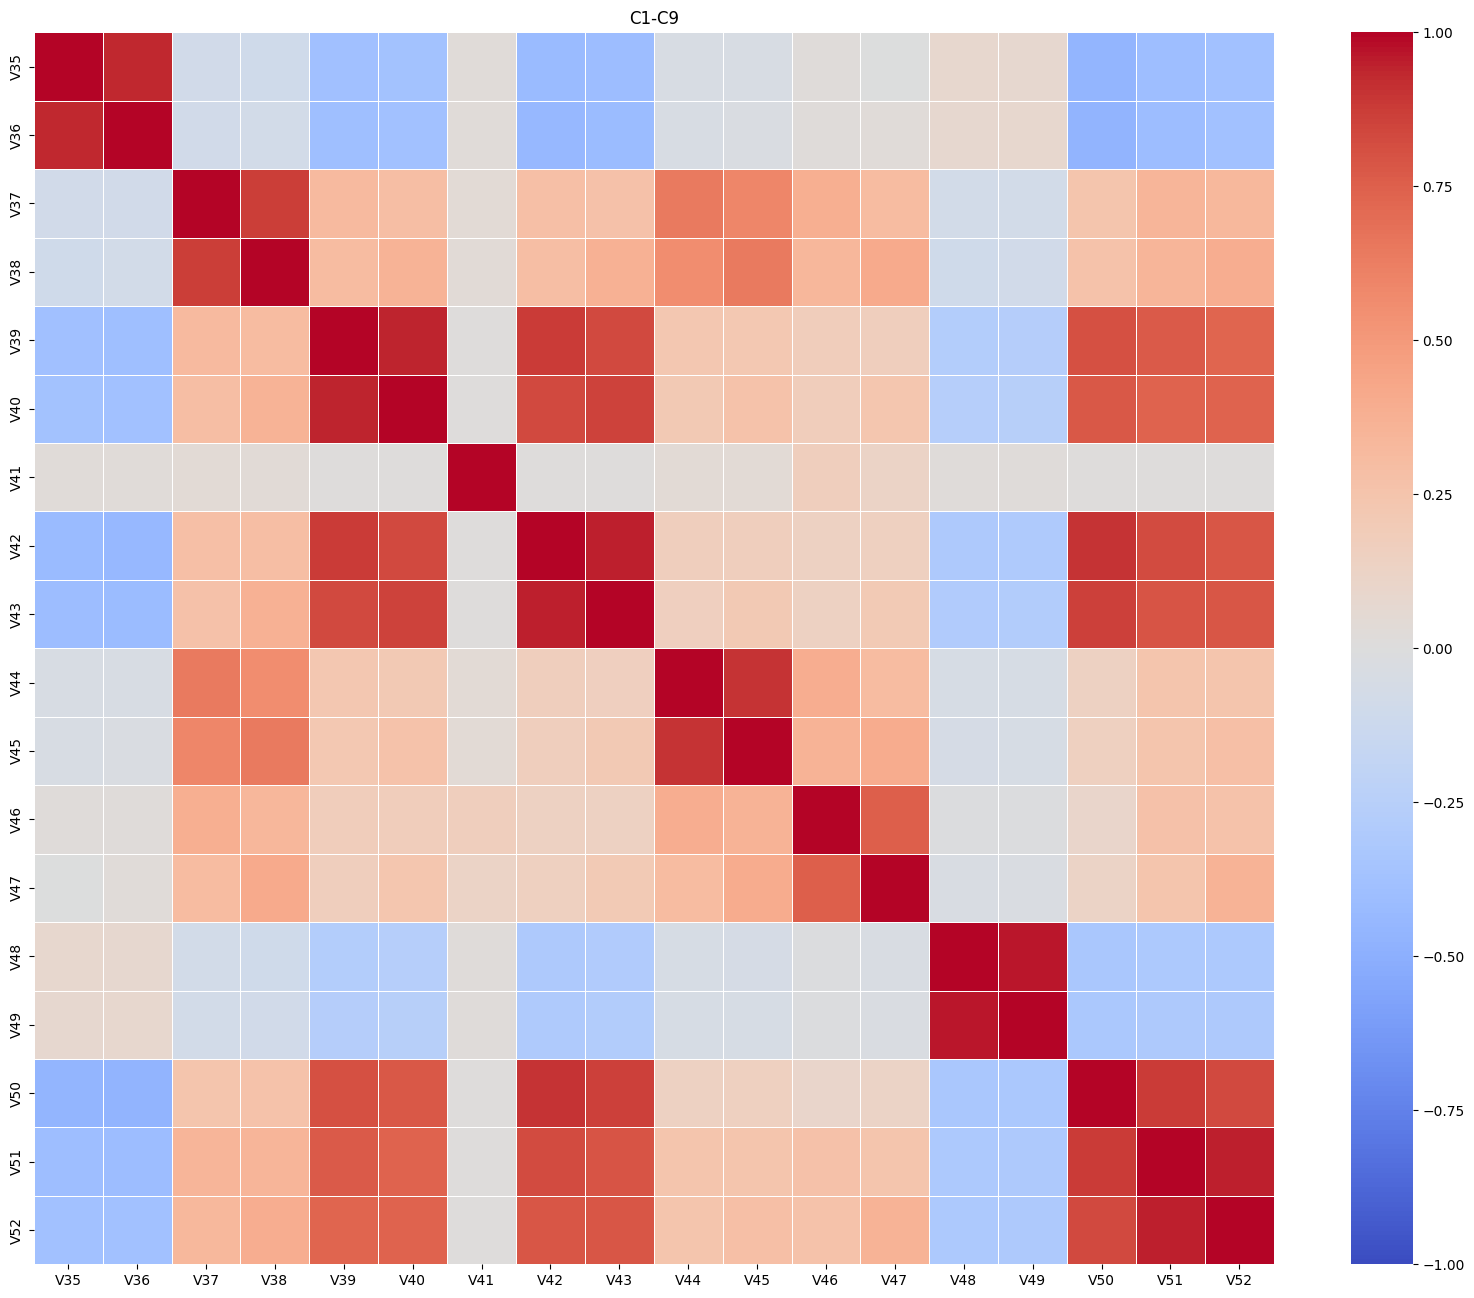

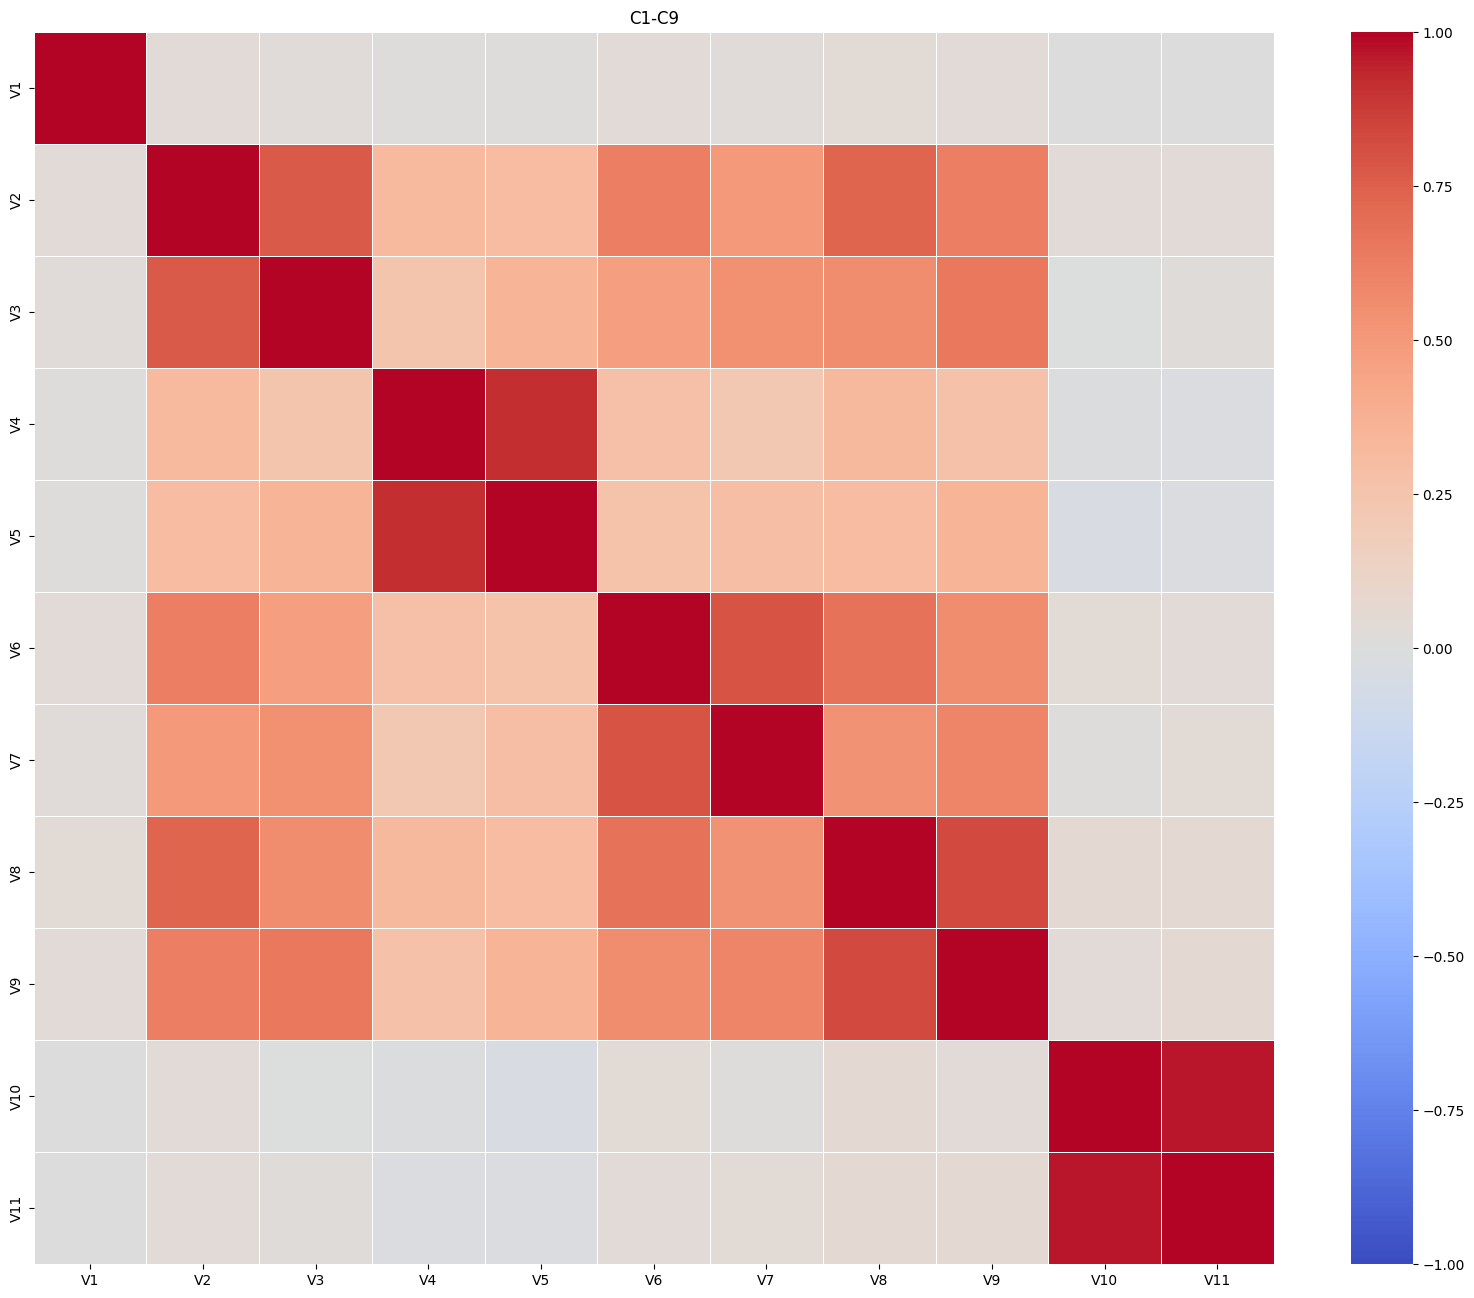

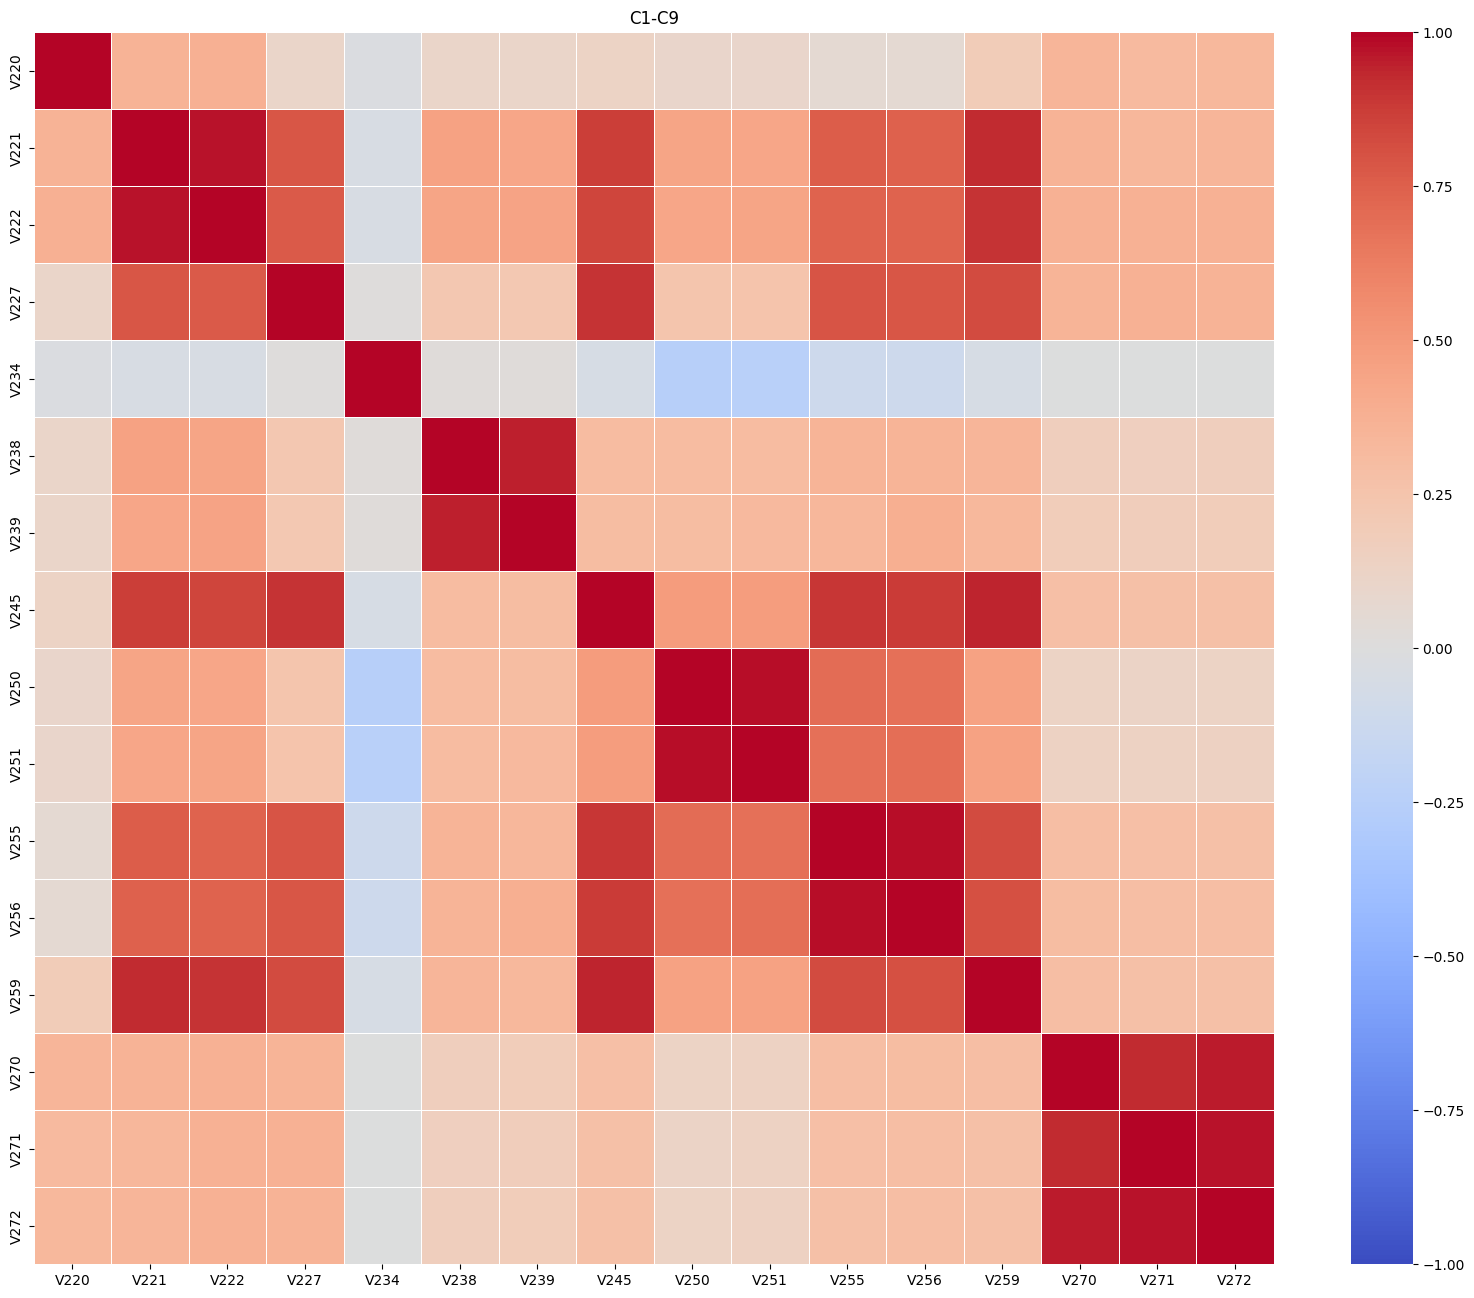

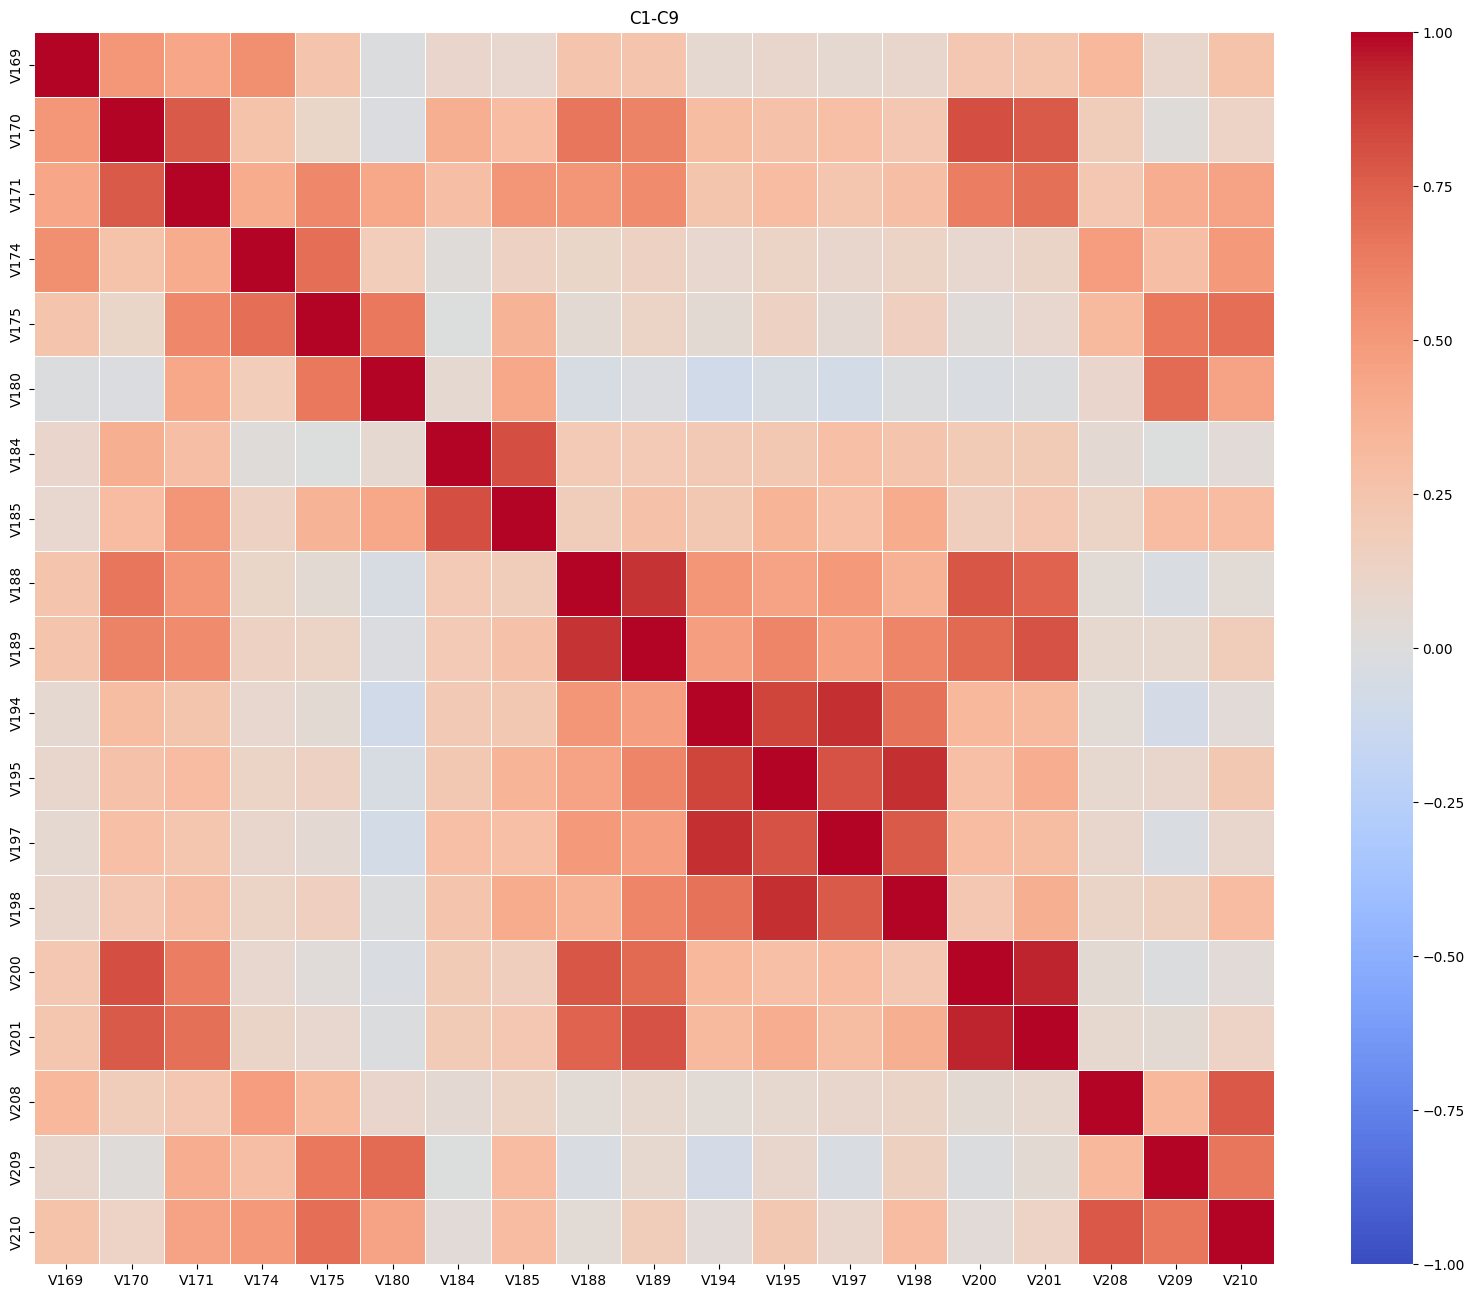

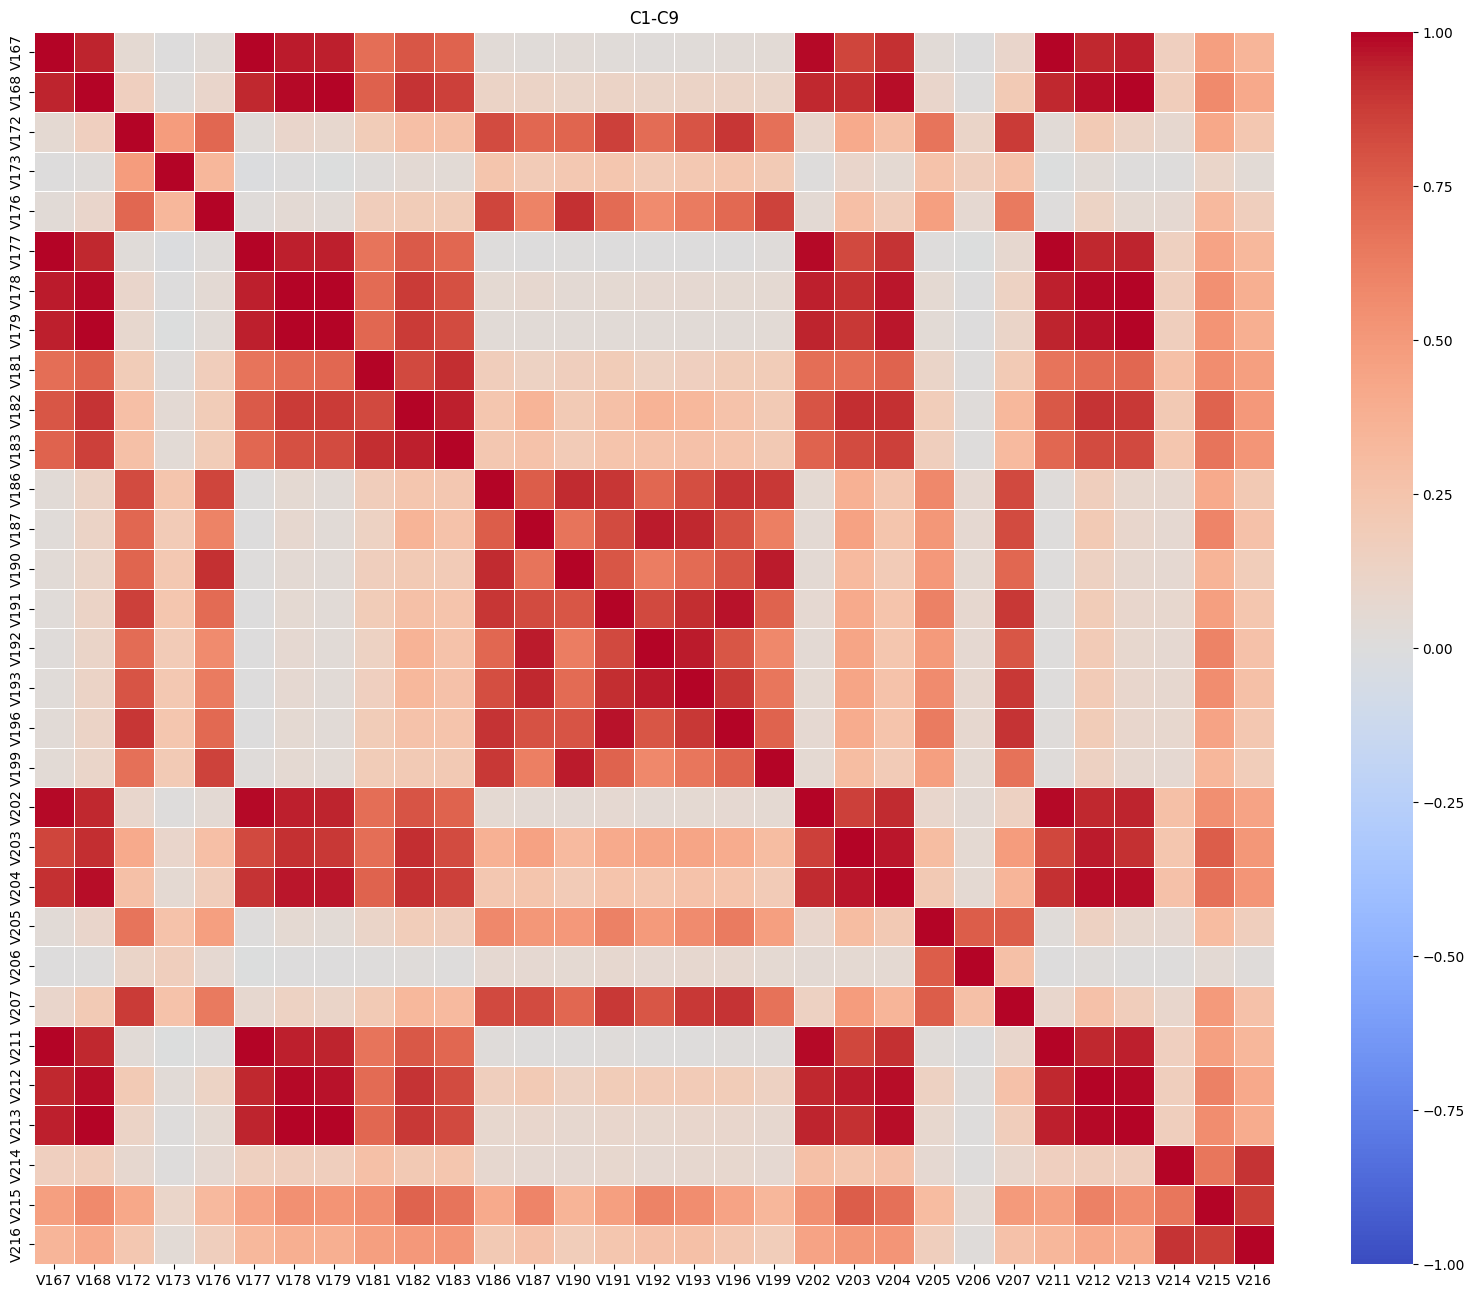

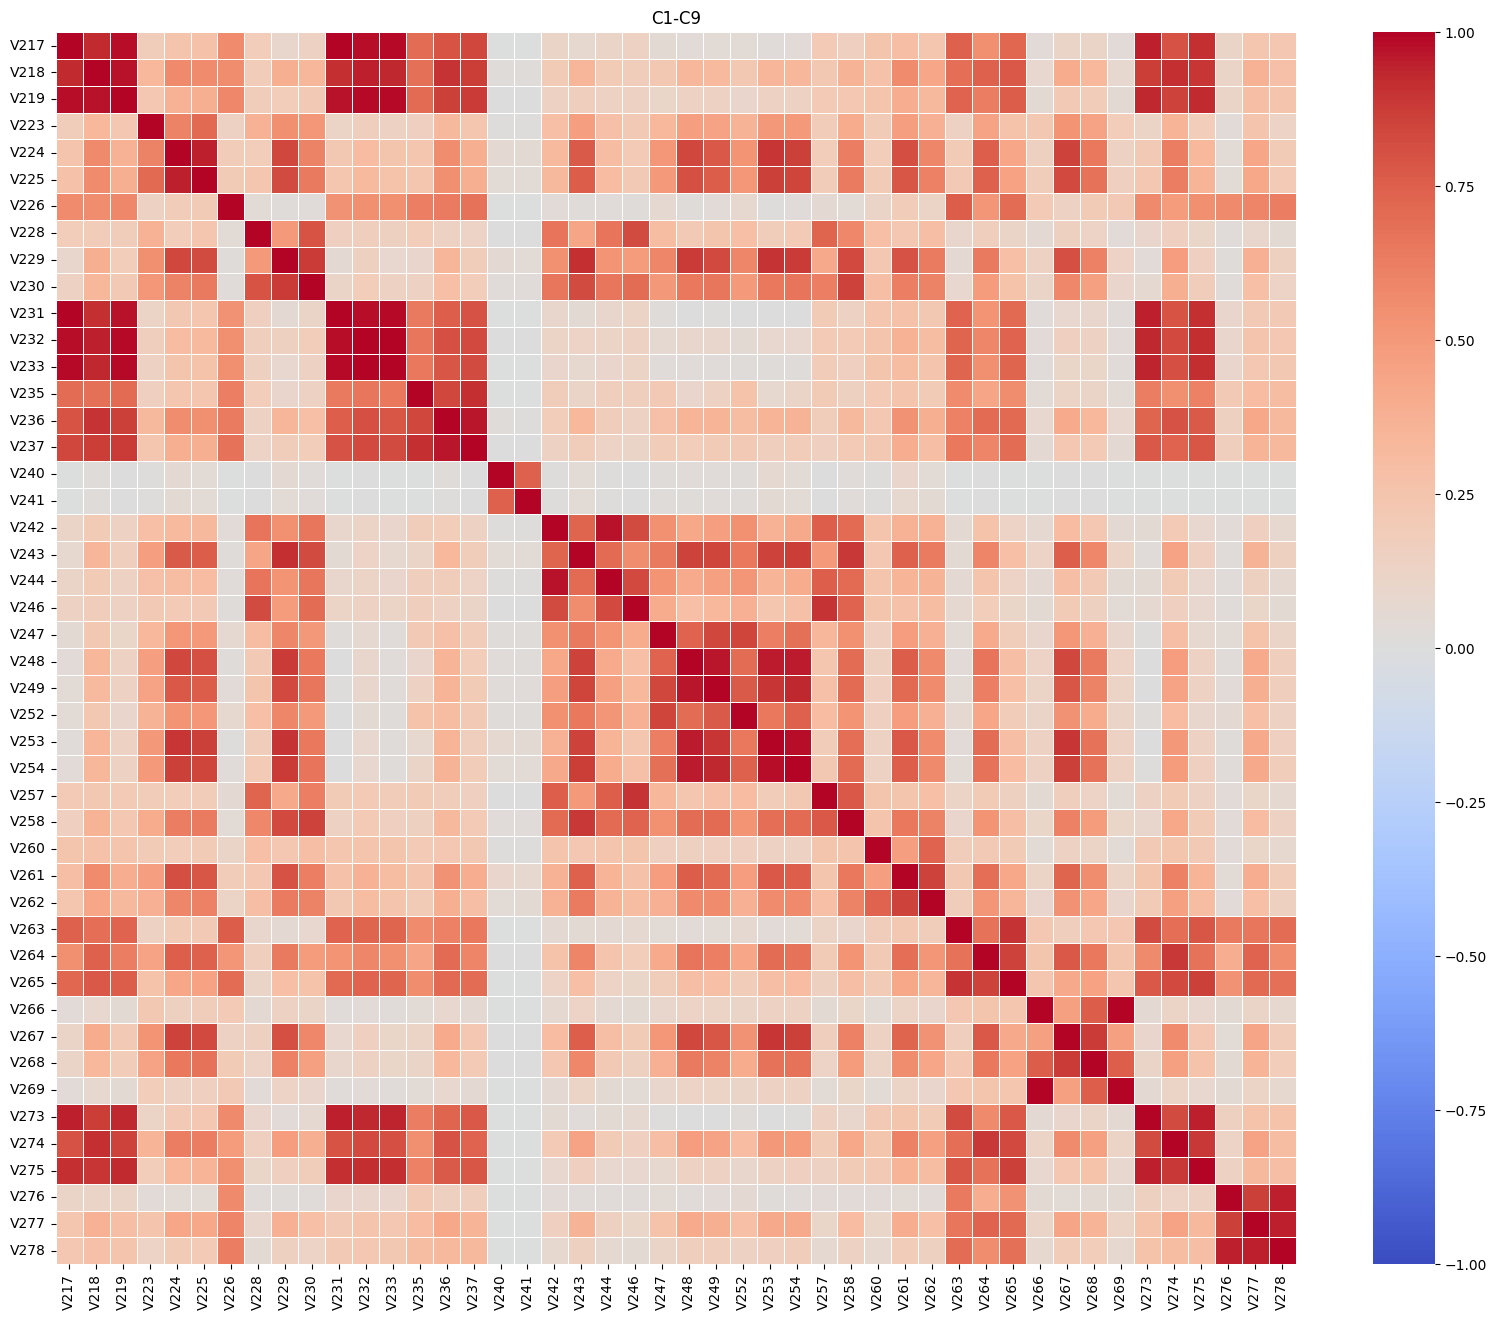

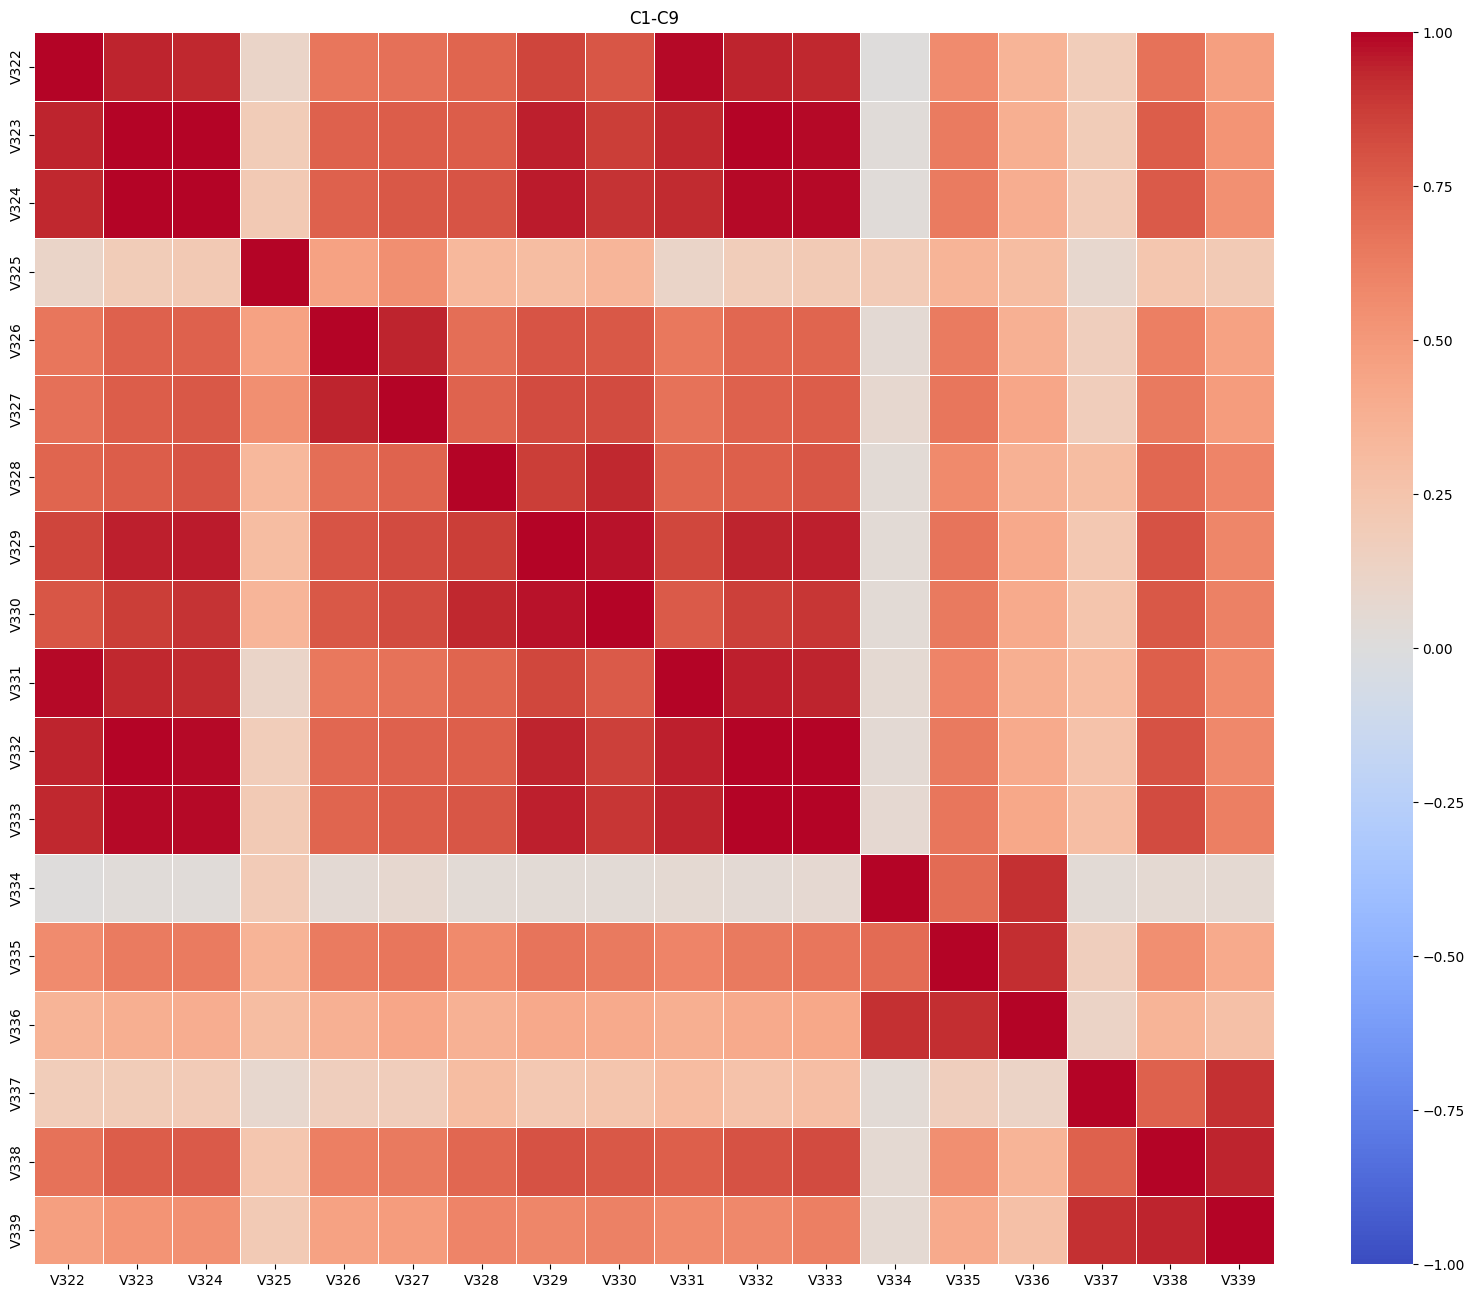

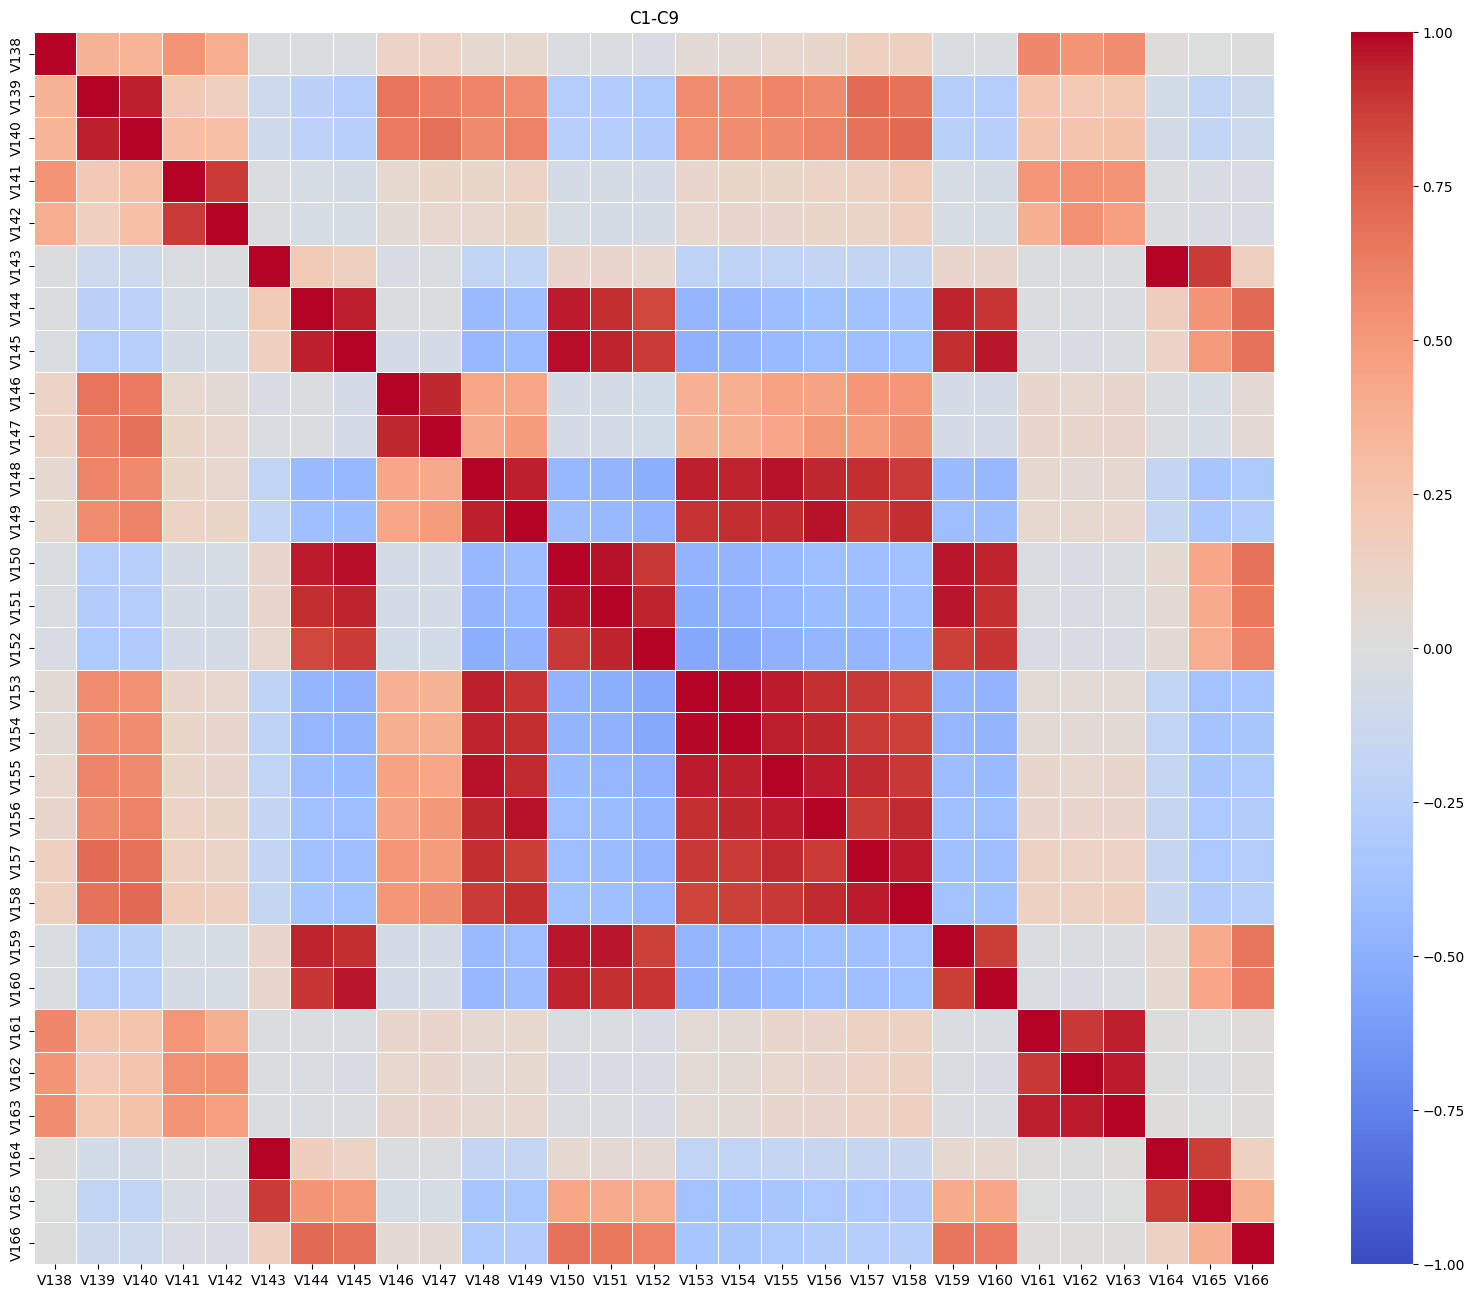

In [8]:
for percent, features in null_groups.items():
    df_temp = df[features]
    corr_matrix = df_temp.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix,cmap="coolwarm", vmax=1, vmin=-1, center=0, linewidths=0.5)
    plt.title("C1-C9")
    plt.show()

In [4]:
df_r = df.filter(['isFraud'])

In [5]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(df_v, df['isFraud'])

/home/darklord/Projects/Bank_fraud/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:01:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [8]:
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": df_v.columns, "Importance": importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importance_df

    Feature  Importance
257    V258    0.227785
224    V225    0.072941
193    V194    0.067303
188    V189    0.033754
200    V201    0.027675
69      V70    0.020995
90      V91    0.020497
93      V94    0.017722
293    V294    0.016762
155    V156    0.011972
148    V149    0.010041
186    V187    0.009138
44      V45    0.008879
199    V200    0.008385
28      V29    0.008345
57      V58    0.008172
253    V254    0.008078
78      V79    0.007774
218    V219    0.007767
307    V308    0.006902
250    V251    0.005997
267    V268    0.005228
47      V48    0.005062
39      V40    0.005040
282    V283    0.004985
73      V74    0.004716
66      V67    0.004700
86      V87    0.004641
272    V273    0.004091
231    V232    0.004052
226    V227    0.003958
169    V170    0.003936
61      V62    0.003933
295    V296    0.003923
142    V143    0.003457
32      V33    0.003345
151    V152    0.003269
332    V333    0.003208
261    V262    0.003045
284    V285    0.002972
133    V134    0

In [ ]:
#TransactionDT TransactionAmt card1 card2 card3 card5 addr1 addr2 dist1 dist2 

In [33]:
df[['addr1', 'isFraud']].value_counts()

addr1  isFraud
299.0  0          45350
325.0  0          41664
204.0  0          40900
264.0  0          39142
330.0  0          25447
315.0  0          22667
441.0  0          20294
272.0  0          19565
123.0  0          15707
184.0  0          14954
126.0  0          14857
191.0  0          14730
337.0  0          14710
181.0  0          13558
143.0  0           9682
476.0  0           9178
310.0  0           8319
472.0  0           8265
327.0  0           8261
387.0  0           8030
512.0  0           7984
433.0  0           7671
231.0  0           7387
485.0  0           6682
269.0  0           6178
205.0  0           5661
225.0  0           5190
251.0  0           5100
494.0  0           5025
220.0  0           4904
226.0  0           4678
498.0  0           4594
177.0  0           4532
203.0  0           3653
420.0  0           3464
110.0  0           3156
436.0  0           3128
469.0  0           2868
324.0  0           2061
444.0  0           2017
170.0  0           1933
3

In [32]:
df['addr1'].value_counts()

addr1
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
184.0    15160
337.0    15149
191.0    14979
181.0    13856
143.0     9806
476.0     9478
310.0     8486
472.0     8478
327.0     8425
512.0     8268
387.0     8187
433.0     7831
231.0     7605
485.0     6816
269.0     6404
205.0     5725
225.0     5323
251.0     5216
494.0     5065
220.0     5041
226.0     4867
498.0     4744
177.0     4674
203.0     3808
420.0     3581
110.0     3220
436.0     3169
469.0     2940
324.0     2173
444.0     2033
170.0     2001
343.0     1734
384.0     1670
122.0     1617
194.0     1572
158.0     1562
428.0     1425
308.0     1279
253.0     1058
492.0      987
448.0      923
502.0      835
284.0      773
465.0      503
161.0      421
296.0      367
130.0      342
536.0      309
157.0      169
511.0      157
418.0      101
148.0       96
356.0       90
348.0       85
242.0       84
508.0       70
254.

In [46]:
correlation = df[['TransactionAmt', 'isFraud']].corr().iloc[0, 1]
print(f"Pearson Correlation: {correlation:.4f}")


Pearson Correlation: 0.0113


In [47]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(df['TransactionAmt'], df['isFraud'])
print(f"Spearman Correlation: {spearman_corr:.4f}")


Spearman Correlation: -0.0016


In [31]:
df['dist2_missing'] = df['dist2'].isna().astype(int)
print(df.groupby('dist2_missing')['isFraud'].mean())

dist2_missing
0    0.099158
1    0.030623
Name: isFraud, dtype: float64


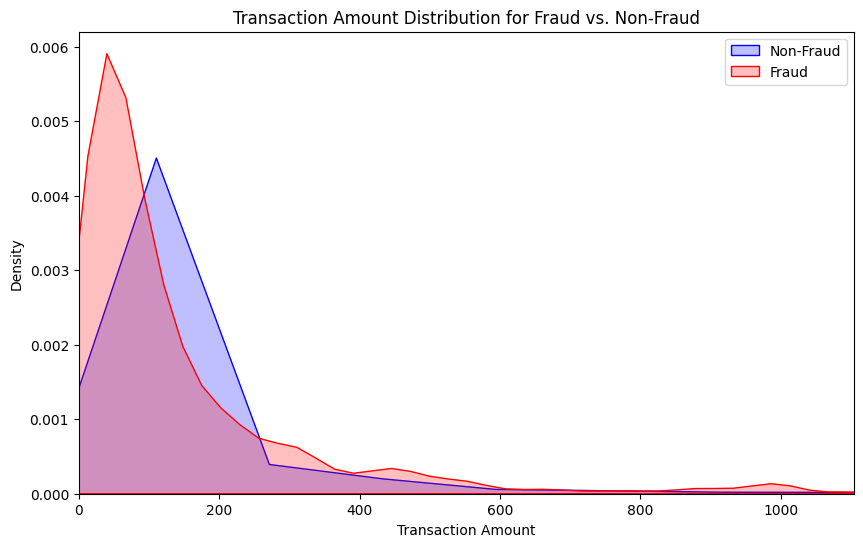

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['isFraud'] == 0]['TransactionAmt'], label="Non-Fraud", fill="true",color="blue")
sns.kdeplot(df[df['isFraud'] == 1]['TransactionAmt'], label="Fraud", fill="true", color="red")
plt.xlim(0, df['TransactionAmt'].quantile(0.99))  # Ignore extreme outliers
plt.title("Transaction Amount Distribution for Fraud vs. Non-Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


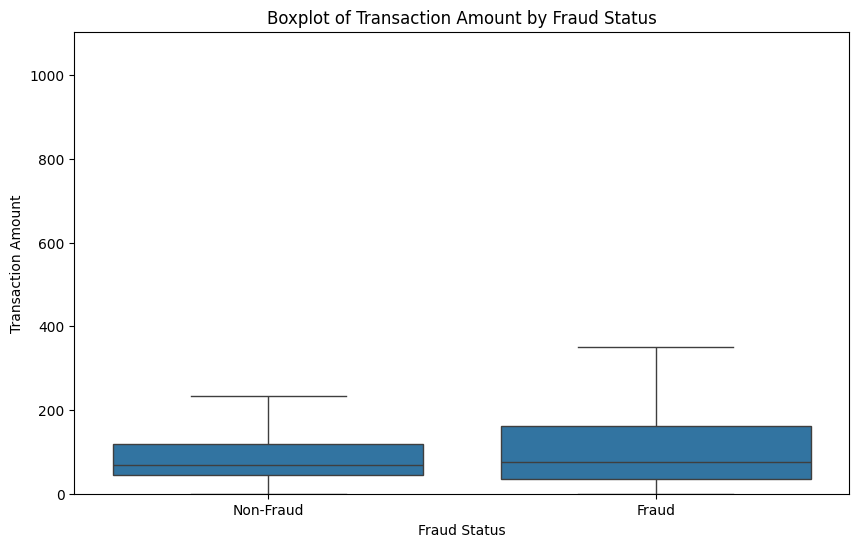

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['isFraud'], y=df['TransactionAmt'], showfliers=False)
plt.ylim(0, df['TransactionAmt'].quantile(0.99))  # Remove extreme outliers
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.title("Boxplot of Transaction Amount by Fraud Status")
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount")
plt.show()


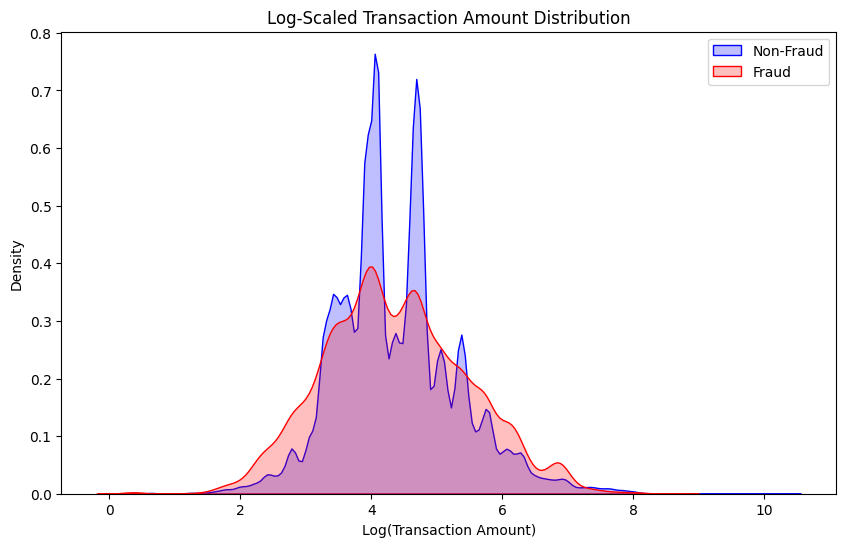

In [54]:
import numpy as np
df['log_TransactionAmt'] = np.log1p(df['TransactionAmt'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['isFraud'] == 0]['log_TransactionAmt'], label="Non-Fraud", fill=True, color="blue")
sns.kdeplot(df[df['isFraud'] == 1]['log_TransactionAmt'], label="Fraud", fill=True, color="red")
plt.title("Log-Scaled Transaction Amount Distribution")
plt.xlabel("Log(Transaction Amount)")
plt.ylabel("Density")
plt.legend()
plt.show()


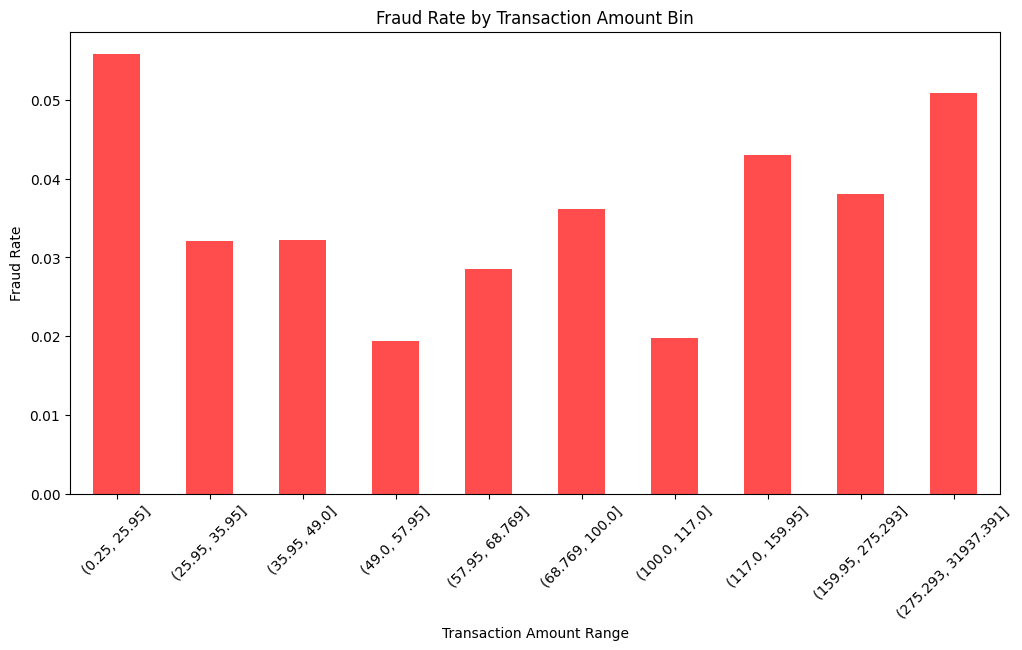

In [57]:
df['TransactionAmt_bin'] = pd.qcut(df['TransactionAmt'], q=10)  # Bin into 10 equal groups

fraud_rates = df.groupby('TransactionAmt_bin', observed=True)['isFraud'].mean()

plt.figure(figsize=(12, 6))
fraud_rates.plot(kind='bar', color='red', alpha=0.7)
plt.xticks(rotation=45)
plt.title("Fraud Rate by Transaction Amount Bin")
plt.xlabel("Transaction Amount Range")
plt.ylabel("Fraud Rate")
plt.show()
